In [1]:
##Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import sklearn
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [3]:
# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

Generic Functions
As we require to EDA for indepedent variables and depedent variable , lets create few generic methods which can be reused.`

In [4]:
## create generic function to plot categorical variable 
def plot_bar_categorial_percentage(data,column):
    ab = pd.DataFrame((data[column].value_counts(normalize=True)*100).round(0).sort_values())
    ab.reset_index(inplace=True)
    ab1 = sns.barplot(x='index',y=column, data=ab, palette='Set1')
        
    plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.xlabel(column, fontsize= 14, fontstyle='italic')
    plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
    plt.title(column+' Analysis', fontsize=16, fontweight='bold')
    plt.grid(True)
        
    for i in ab1.patches:
        ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        

In [5]:
def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

In [6]:
## for better reading and DRY
def show_plot(plt):
    plt.grid(True)
    plt.tight_layout()
    plt.autoscale()
    plt.show()

In [7]:
## for better reading and DRY
def show_box_plot(plt,data,field):
    plt.figure(figsize=(20, 12))
    plt.subplot(2,4,1)
    sns.boxplot(x=data[field])

    plt.show()

In [8]:
def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

In [9]:
def scatter_plt(data,column1,column2,column3,target,subp):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    if subp == 3:
        x=1
        y=3
        z=1
    elif subp ==2:
        x=1
        y=2
        z=1
    plt.subplot(x,y,z)
    plt.scatter(x= data[column1], y= df[target])
    plt.title((target + " vs "+ column1), fontweight='bold', fontsize=15)
    plt.xlabel(column1, fontsize=13, fontstyle='italic')
    plt.ylabel(target, fontsize=13, fontstyle='italic')
    plt.grid(True)
    z = z+1
    #subplot (132)
    plt.subplot(x,y,z)
    plt.scatter(x= data[column2], y= df[target])
    plt.title((target + " vs "+ column2), fontweight='bold', fontsize=15)
    plt.xlabel(column2, fontsize=13, fontstyle='italic')
    plt.ylabel(target, fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    if z != y:
        z = z+1
        plt.subplot(x,y,z)
        plt.scatter(x= data[column3], y= df[target])
        plt.title((target + " vs "+ column3), fontweight='bold', fontsize=15)
        plt.xlabel(column2, fontsize=13, fontstyle='italic')
        plt.ylabel(target, fontsize=13, fontstyle='italic')
        plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

In [10]:
def create_dummies(data,list_column,prefix1):
    s = []
    #this FOR loop is purely for creating and storing the dynamic variable names in s
    for x in range(1,len(orig_before_dum_cols),+1):
        s.append(prefix1 + str(list_column[x]))
    for i in s:
        i = pd.get_dummies(data[i[3:]], prefix= i, drop_first = True)
        data = pd.concat([data, i], axis = 1)
    return data

In [11]:
def create_resd_qqplot(data,target,title):
    ##tranforming the target variable 'SalePrice' using Log-Transform. SalePrice Distribution (After Log-Transformation)

    from scipy import stats
    from scipy.stats import norm

##lets  apply log(1+x) to all elements of the target variable column
    data[target] = np.log1p(data[target])

    plt.figure(figsize=(6,8), dpi=100)
    plt.subplot(211)
    sns.distplot(data[target], fit=norm)

    (mu, sigma) = norm.fit(data[target])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency', fontsize=10)
    plt.title(title, fontsize=14, fontweight='bold')

    plt.subplot(212)
    res = stats.probplot(data[target], plot=plt)

    plt.autoscale()
    plt.tight_layout()
    plt.show()

In [12]:
def create_scatter_plt_test_pred(y_test_val,y_pred_test_val,title,xlabel,ylabel):
    sns.set_style('white')
    fig = plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(y_test_val,y_pred_test_val)
    fig.suptitle(title, fontsize=18)             
    plt.xlabel(xlabel, fontsize=14)                       
    plt.ylabel(ylabel, fontsize=14)  
    plt.grid(True)
    plt.show()

In [13]:
def create_plt_act_pred(y_train_val,y_pred_train_val,y_train_series,y_pred_train_series,title,xlabel,ylabel):
    sns.set_style('white')
    plt.figure(figsize = (10,4), dpi=120)
    plt.plot(y_train_series, y_pred_train_val, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
    plt.plot(y_pred_train_series, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
    plt.title(title, fontsize=15, fontweight='bold')    
    plt.xlabel(xlabel, fontsize=15, fontstyle='italic')                              
    plt.ylabel(ylabel, fontsize=15, fontstyle='italic')  
    plt.show()

In [14]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(data):
    df_1 = data.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

In [15]:
def create_box_plot(data,column1,column2,column3):
    plt.figure(figsize=(20, 12))
    plt.subplot(2,4,1)
    sns.boxplot(x=data[column1])

    plt.subplot(2,4,2)
    sns.boxplot(x=data[column1])

    plt.subplot(2,4,3)
    sns.boxplot(x=data[column1])


    plt.show()

In [16]:
def display_metadata(df) : 
    return pd.DataFrame({
                'Datatype' : df.dtypes.astype(str), 
                'Non_Null_Count': df.count(axis = 0).astype(int), 
                'Null_Count': df.isnull().sum().astype(int), 
                'Null_Percentage': round(df.isnull().sum()/len(df) * 100 , 2), 
                'Unique_Values_Count': df.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

In [17]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def fetch_vif(df, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(df[selected_columns].values, i) for i in range(df[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

In [18]:
# Function for Baseline Performance Metrics
import math
def model_stats(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

## Reading the data 

In [19]:
# Reading the dataset
df = pd.read_csv('/Users/i311077/Downloads/Telecom-Churn-main/train.csv')


In [20]:
#display information and getting the data information about data type , NULL percentage and unique value count
df.info()
display_metadata(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


In [21]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [22]:
#describe the data
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [23]:
#check the columns of data
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [24]:
#info about the column types etc. 
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [25]:
#check the size of data
df.size

12039828

# Cleaning of data

## Check for Duplicates

In [26]:
# Checking for the duplicates
df.drop_duplicates(subset=None, inplace=True)
df.shape

(69999, 172)

## Handling missing values

In [27]:
##check null values and percentage
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

,0
loc_og_t2o_mou,1.00
std_og_t2o_mou,1.00
loc_ic_t2o_mou,1.00
last_date_of_month_7,0.57
last_date_of_month_8,1.05
onnet_mou_6,3.95
onnet_mou_7,3.84
onnet_mou_8,5.29
offnet_mou_6,3.95
offnet_mou_7,3.84


In [28]:
missing_values = round((df.isnull().sum()/len(df.id))*100, 2) 
print(missing_values)

id                          0.00 
circle_id                   0.00 
loc_og_t2o_mou              1.00 
std_og_t2o_mou              1.00 
loc_ic_t2o_mou              1.00 
last_date_of_month_6        0.00 
last_date_of_month_7        0.57 
last_date_of_month_8        1.05 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 3.95 
onnet_mou_7                 3.84 
onnet_mou_8                 5.29 
offnet_mou_6                3.95 
offnet_mou_7                3.84 
offnet_mou_8                5.29 
roam_ic_mou_6               3.95 
roam_ic_mou_7               3.84 
roam_ic_mou_8               5.29 
roam_og_mou_6               3.95 
roam_og_mou_7               3.84 
roam_og_mou_8               5.29 
loc_og_t2t_mou_6            3.95 
loc_og_t2t_mou_7            3.84 
loc_og_t2t_mou_8            5.29 
loc_og_t2m_mou_6            3.95 
loc_og_t2m_mou_7            3.84 
loc_og_t2m_mou_8            5.29 
loc_og_t2f_mou

## Handling Null/Missing  values

In [29]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.90
count_rech_2g_6,74.90
night_pck_user_6,74.90
arpu_2g_6,74.90
date_of_last_rech_data_6,74.90
total_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
fb_user_6,74.90


In [30]:
# remove columns with missing values > 70
columns_with_missing_values = list(missing_values[missing_values >=70].index)
print(columns_with_missing_values)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [31]:
df = df.drop(columns_with_missing_values,axis=1)
df.shape

(69999, 142)

In [32]:
df.nunique().sort_values()

std_ic_t2o_mou_7        1    
circle_id               1    
loc_og_t2o_mou          1    
std_og_t2o_mou          1    
loc_ic_t2o_mou          1    
last_date_of_month_6    1    
last_date_of_month_7    1    
last_date_of_month_8    1    
std_og_t2c_mou_7        1    
std_ic_t2o_mou_8        1    
std_ic_t2o_mou_6        1    
std_og_t2c_mou_8        1    
std_og_t2c_mou_6        1    
churn_probability       2    
monthly_2g_6            5    
monthly_2g_8            6    
monthly_2g_7            6    
monthly_3g_6            10   
monthly_3g_8            12   
monthly_3g_7            13   
sachet_3g_6             23   
sachet_3g_7             26   
sachet_3g_8             28   
date_of_last_rech_6     30   
sachet_2g_6             30   
date_of_last_rech_8     31   
date_of_last_rech_7     31   
sachet_2g_8             32   
sachet_2g_7             33   
spl_ic_mou_6            78   
total_rech_num_8        92   
total_rech_num_6        94   
spl_ic_mou_8            95   
total_rech

In [33]:
##check if any null values in categorical column

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]

In [34]:
missing_cat_obj_null_prcnt

last_date_of_month_7    0.57
last_date_of_month_8    1.05
date_of_last_rech_6     1.57
date_of_last_rech_7     1.76
date_of_last_rech_8     3.52
dtype: float64

In [35]:
## as it is categorical variable and have some meaningful information as per data dictionary , lets fill as of now None 

cat_null_obj_cols = [ 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 
            'date_of_last_rech_8']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [36]:
##check null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [37]:
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

Number of categorical object type columns removed:  3 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.

In [38]:
##rechecking null values in the categorical columns

cat_obj_null_cols = df.select_dtypes(include='object')  
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [39]:
##creating a dataframe 'df_obj_cat' with object type categorical variables 
obj_type_cat = df.select_dtypes(include='object').columns
df_obj_cat = df.loc[:,obj_type_cat]
df_obj_cat.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


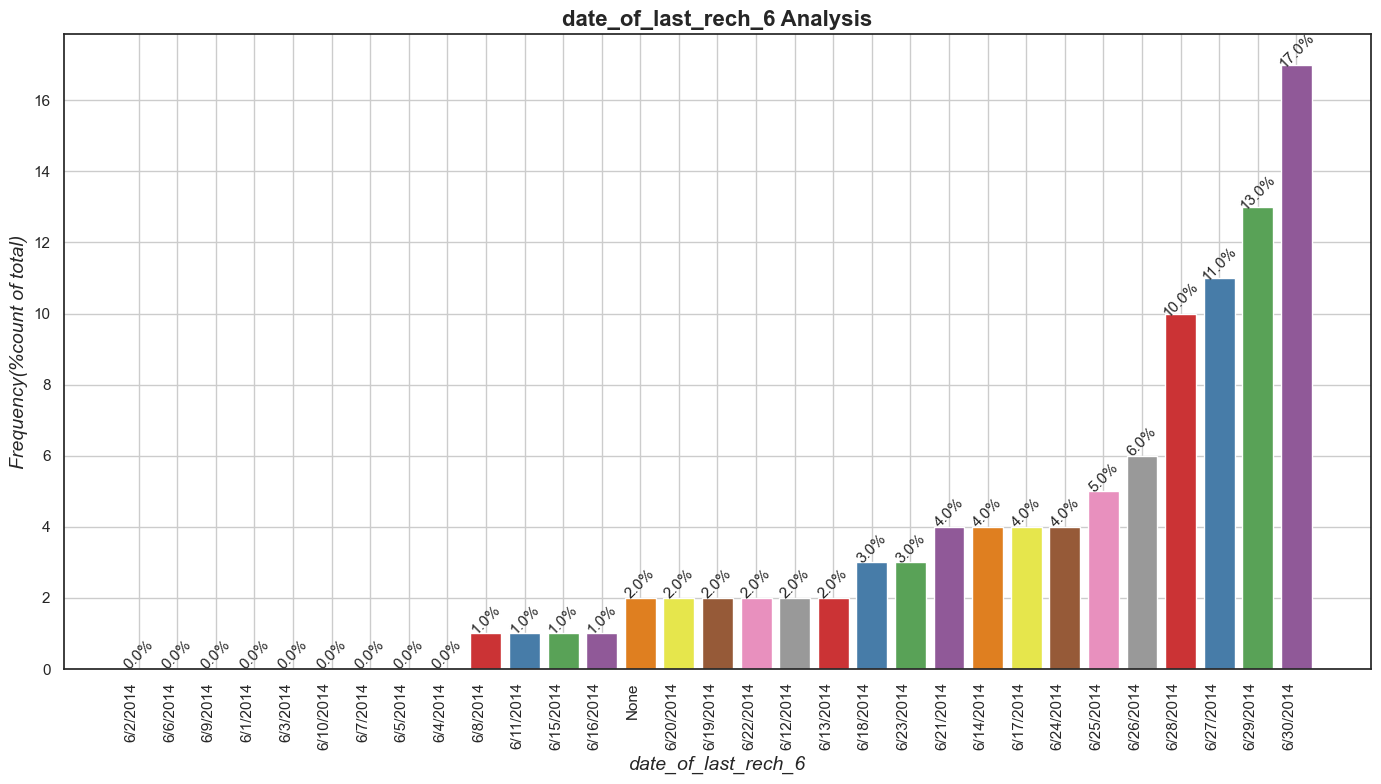

The highest % in  date_of_last_rech_6 category is  [17.0]


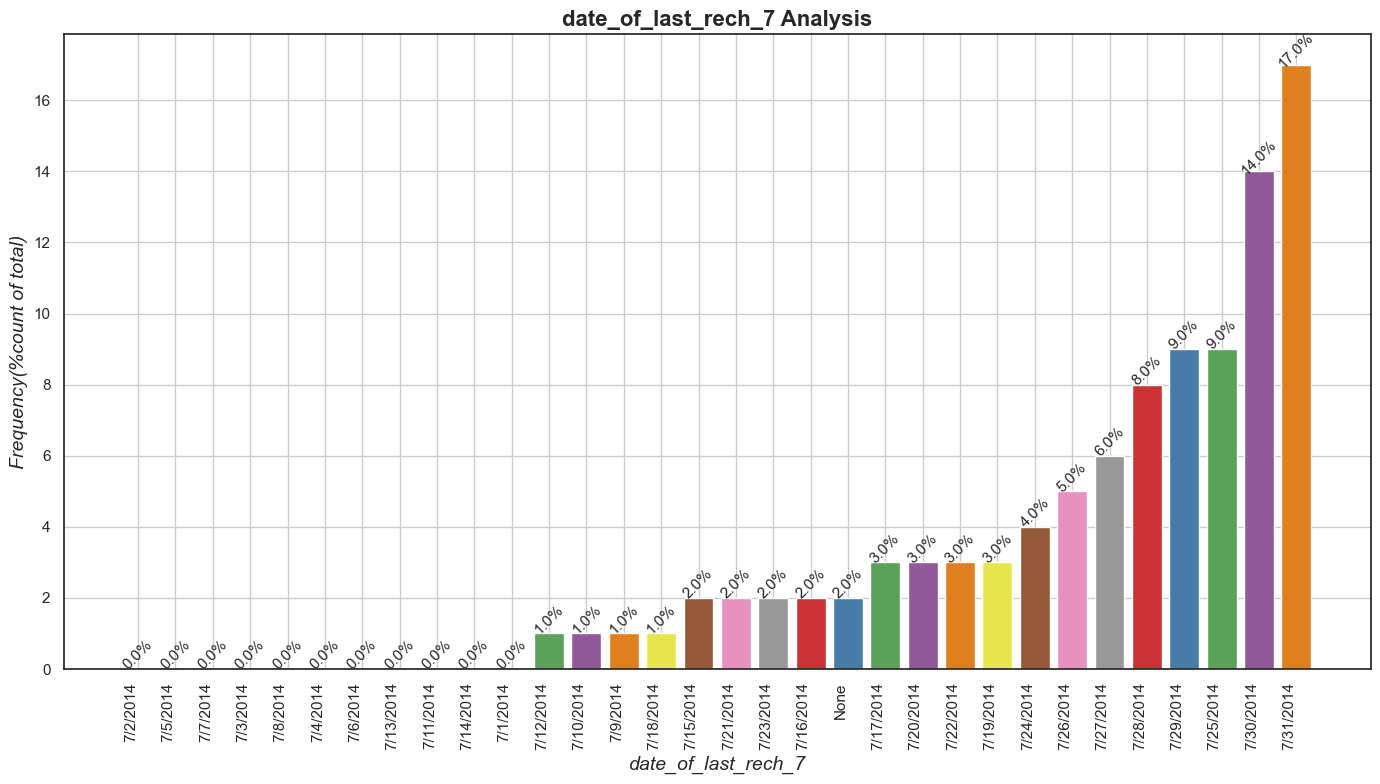

The highest % in  date_of_last_rech_7 category is  [17.0]


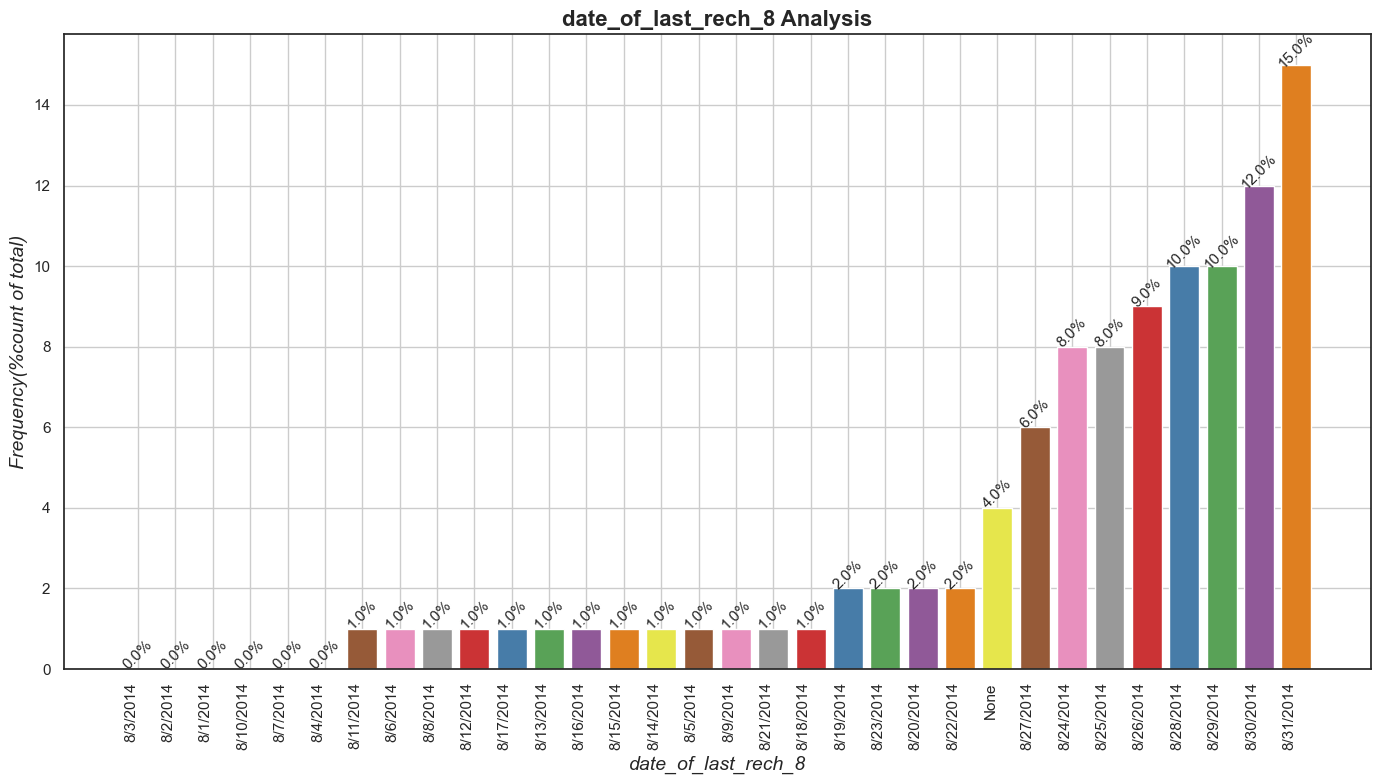

The highest % in  date_of_last_rech_8 category is  [15.0]


In [40]:
for i in range(0,len(df_obj_cat.columns),1):
    sns.set(style='white')
    plt.figure(figsize=(14, 8), dpi=100)
    plot_bar_categorial_percentage(df,df_obj_cat.columns[i])
    show_plot(plt)
    ab = pd.DataFrame((df[df_obj_cat.columns[i]].value_counts(normalize=True)*100).round(0).sort_values())
    text = ab.values.tolist()[-1]
    print('The highest % in  '+ df_obj_cat.columns[i] +' category is  ' + str(text))

In [41]:
##checking  null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

loc_og_t2o_mou      1.00
std_og_t2o_mou      1.00
loc_ic_t2o_mou      1.00
onnet_mou_6         3.95
onnet_mou_7         3.84
onnet_mou_8         5.29
offnet_mou_6        3.95
offnet_mou_7        3.84
offnet_mou_8        5.29
roam_ic_mou_6       3.95
roam_ic_mou_7       3.84
roam_ic_mou_8       5.29
roam_og_mou_6       3.95
roam_og_mou_7       3.84
roam_og_mou_8       5.29
loc_og_t2t_mou_6    3.95
loc_og_t2t_mou_7    3.84
loc_og_t2t_mou_8    5.29
loc_og_t2m_mou_6    3.95
loc_og_t2m_mou_7    3.84
loc_og_t2m_mou_8    5.29
loc_og_t2f_mou_6    3.95
loc_og_t2f_mou_7    3.84
loc_og_t2f_mou_8    5.29
loc_og_t2c_mou_6    3.95
loc_og_t2c_mou_7    3.84
loc_og_t2c_mou_8    5.29
loc_og_mou_6        3.95
loc_og_mou_7        3.84
loc_og_mou_8        5.29
std_og_t2t_mou_6    3.95
std_og_t2t_mou_7    3.84
std_og_t2t_mou_8    5.29
std_og_t2m_mou_6    3.95
std_og_t2m_mou_7    3.84
std_og_t2m_mou_8    5.29
std_og_t2f_mou_6    3.95
std_og_t2f_mou_7    3.84
std_og_t2f_mou_8    5.29
std_og_t2c_mou_6    3.95


## Outliers Treatment using box plot

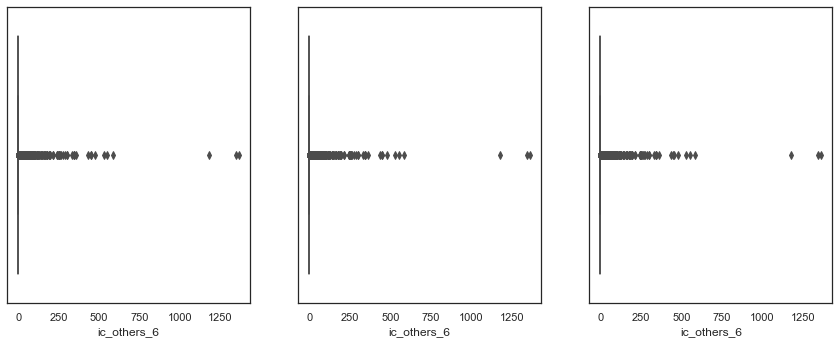

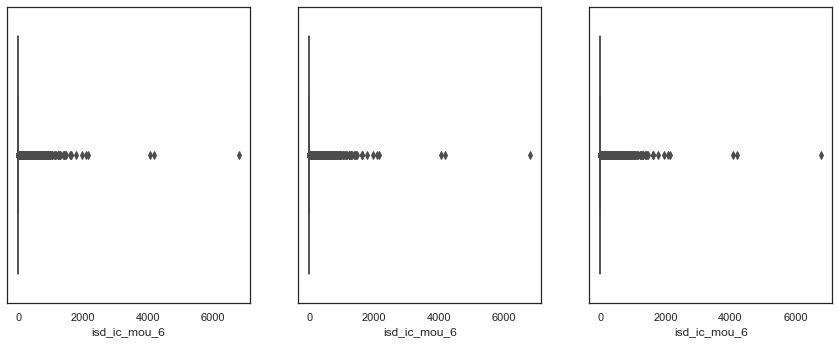

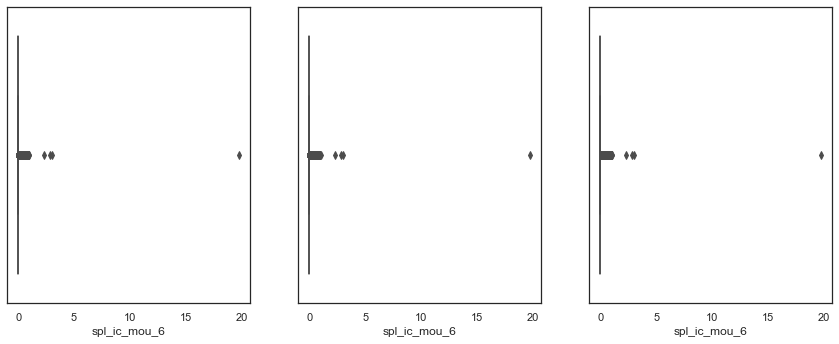

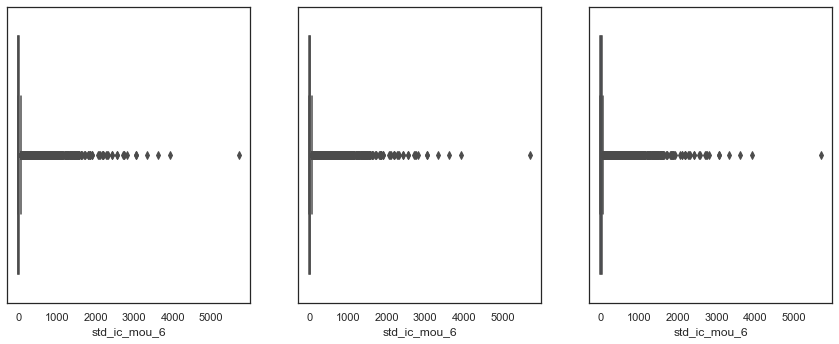

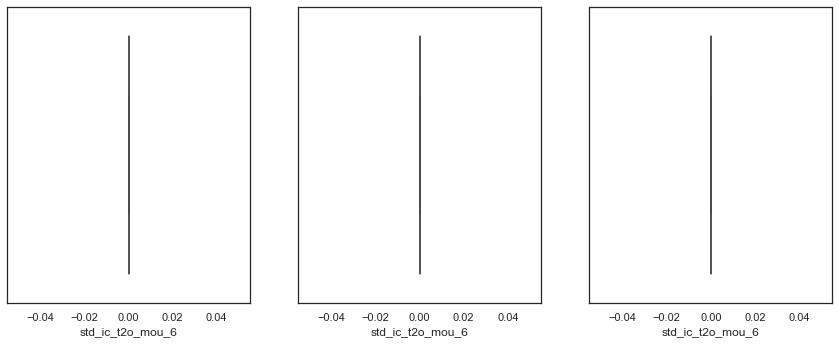

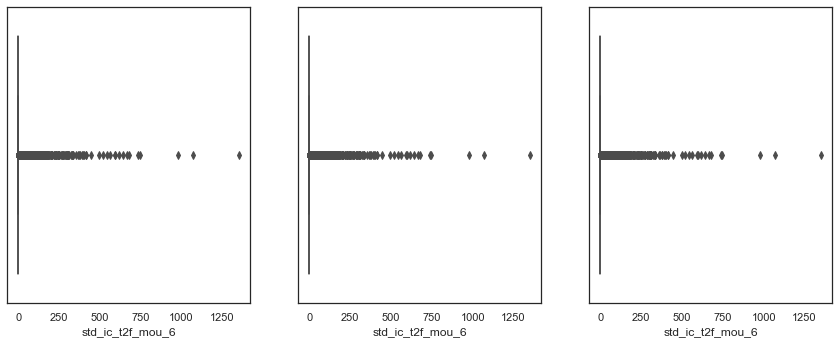

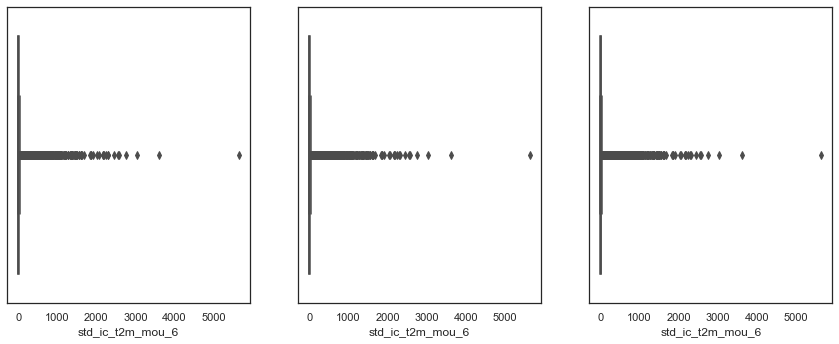

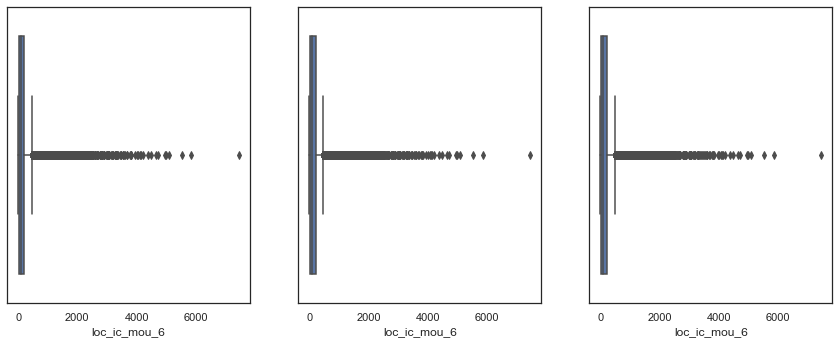

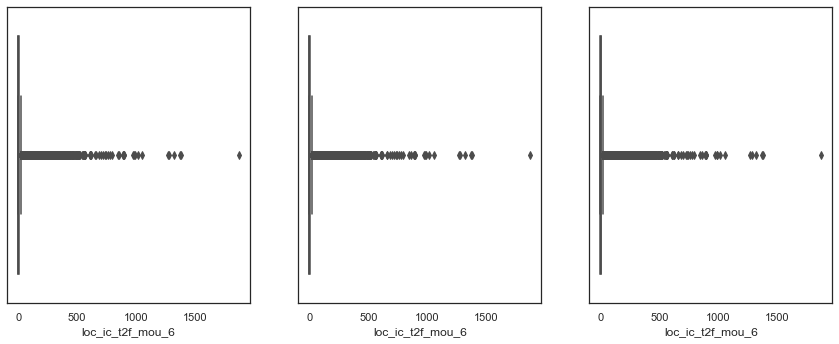

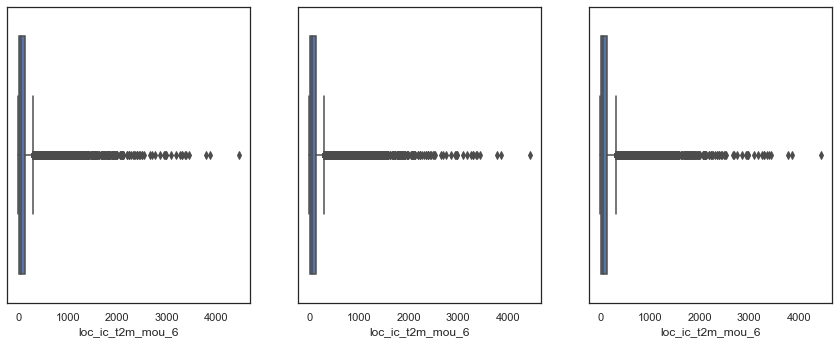

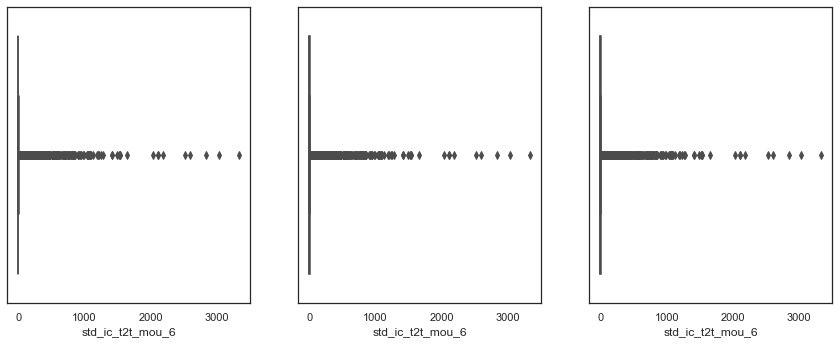

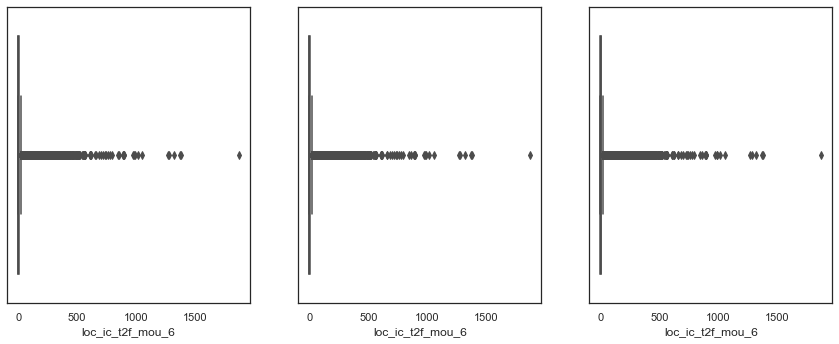

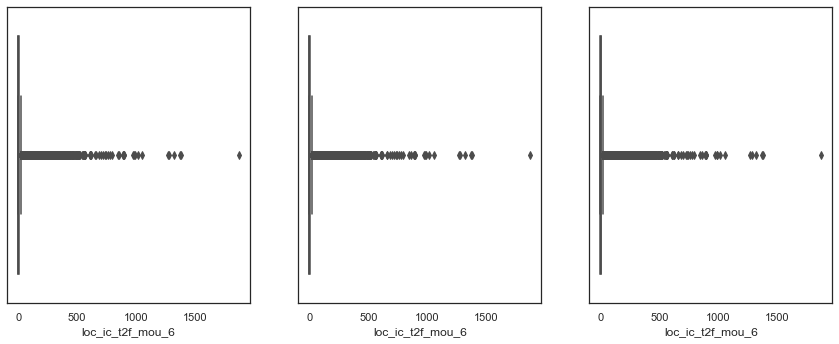

In [42]:
create_box_plot(df,"ic_others_6","ic_others_7","ic_others_8")
create_box_plot(df,"isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8")
create_box_plot(df,"spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8")
create_box_plot(df,"std_ic_mou_6","std_ic_mou_7","std_ic_mou_8")
create_box_plot(df,"std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8")
create_box_plot(df,"std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8")
create_box_plot(df,"std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8")
create_box_plot(df,"loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8")
create_box_plot(df,"loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8")
create_box_plot(df,"loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8")
create_box_plot(df,"std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8")
create_box_plot(df,"loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8")
create_box_plot(df,"loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8")

As there are many outliers , lets keep data between 10th percentile and 90th percentile

In [43]:
for col in numeric_null_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

In [44]:
data.shape

(69999, 139)

In [45]:
#shape of the data
df.shape

(69999, 139)

As the recharge amount, call usage , data usgae varies from every month, we will check indiviusal month to decide how to handle the null values

In [46]:
import re

In [47]:
sixth_month_columns = []

sixth_month_columns = df.filter(regex='6$', axis=1).columns


metadata = display_metadata(df)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_6,float64,67231,2768,3.95,11637
isd_ic_mou_6,float64,67231,2768,3.95,4421
spl_og_mou_6,float64,67231,2768,3.95,3503
std_ic_t2f_mou_6,float64,67231,2768,3.95,2624
onnet_mou_6,float64,67231,2768,3.95,20057
std_ic_t2m_mou_6,float64,67231,2768,3.95,7931
isd_og_mou_6,float64,67231,2768,3.95,1103
og_others_6,float64,67231,2768,3.95,914
loc_ic_mou_6,float64,67231,2768,3.95,24442
std_og_mou_6,float64,67231,2768,3.95,21837


In [48]:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 3.95
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_6', 'isd_ic_mou_6', 'spl_og_mou_6',
       'std_ic_t2f_mou_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'isd_og_mou_6', 'og_others_6', 'loc_ic_mou_6', 'std_og_mou_6',
       'offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2c_mou_6',
       'std_og_t2f_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2m_mou_6',
       'std_ic_mou_6', 'loc_og_t2f_mou_6', 'roam_og_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2t_mou_6', 'spl_ic_mou_6', 'roam_ic_mou_6',
       'std_og_t2m_mou_6', 'loc_ic_t2m_mou_6', 'ic_others_6',
       'std_ic_t2t_mou_6'], dtype=object)

In [49]:
# find null values rows and remove those rows
condition = df[sixth_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*df.shape[0], index = df.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is for month of June', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is for month of June ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is for month of June 0.0
Total incoming mou for each customer with missing *_mou data is for month of June  0.0


In [50]:
# Imputation
df[sixth_month_meaningful_missing_cols] = df[sixth_month_meaningful_missing_cols].fillna(0)

metadata = display_metadata(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
max_rech_amt_6,int64,69999,0,0.0,190
total_rech_amt_6,int64,69999,0,0.0,2108
total_rech_num_6,int64,69999,0,0.0,94
monthly_3g_6,int64,69999,0,0.0,10
monthly_2g_6,int64,69999,0,0.0,5
vol_3g_mb_6,float64,69999,0,0.0,9768
sachet_3g_6,int64,69999,0,0.0,23
vol_2g_mb_6,float64,69999,0,0.0,11494
last_day_rch_amt_6,int64,69999,0,0.0,179
date_of_last_rech_6,object,69999,0,0.0,31


In [51]:
# Checking for null values
df.isnull().sum()

id                     0   
circle_id              0   
loc_og_t2o_mou         702 
std_og_t2o_mou         702 
loc_ic_t2o_mou         702 
arpu_6                 0   
arpu_7                 0   
arpu_8                 0   
onnet_mou_6            0   
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           0   
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          0   
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          0   
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       0   
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       0   
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       0   
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       0   
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           0   
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6    

In [52]:
seventh_month_columns = df.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7',
       'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7',
       'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'date_of_last_rech_7', 'last_day_rch_amt_7', 'vol_2g_mb_7',
       'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7',
       'sachet_3g_7'],
      dtype='object')

In [53]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_7,float64,67312,2687,3.84,1084
roam_ic_mou_7,float64,67312,2687,3.84,4240
spl_og_mou_7,float64,67312,2687,3.84,3827
og_others_7,float64,67312,2687,3.84,148
loc_ic_t2t_mou_7,float64,67312,2687,3.84,11595
offnet_mou_7,float64,67312,2687,3.84,26139
loc_ic_t2m_mou_7,float64,67312,2687,3.84,18945
loc_og_t2m_mou_7,float64,67312,2687,3.84,17641
std_og_mou_7,float64,67312,2687,3.84,22088
loc_ic_mou_7,float64,67312,2687,3.84,24258


In [54]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 3.84
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['isd_og_mou_7', 'roam_ic_mou_7', 'spl_og_mou_7', 'og_others_7',
       'loc_ic_t2t_mou_7', 'offnet_mou_7', 'loc_ic_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_mou_7', 'loc_ic_mou_7', 'onnet_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7',
       'ic_others_7', 'loc_ic_t2f_mou_7', 'loc_og_mou_7',
       'loc_og_t2c_mou_7', 'std_og_t2m_mou_7', 'roam_og_mou_7',
       'std_og_t2t_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7',
       'loc_og_t2f_mou_7', 'std_og_t2c_mou_7'], dtype=object)

In [55]:
# Checking 7th month for rows for which columns are null
condition = df[seventh_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*df.shape[0], index = df.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is for month of July', data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is for month of July ', data.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is for month of July 0.0
Total incoming mou for each customer with missing *_mou data is for month of July  0.0


In [56]:
# Imputation
df[seventh_month_meaningful_missing_cols] = df[seventh_month_meaningful_missing_cols].fillna(0)

metadata = display_metadata(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_7,float64,69999,0,0.0,1
total_rech_num_7,int64,69999,0,0.0,96
total_rech_amt_7,int64,69999,0,0.0,2147
std_ic_mou_7,float64,69999,0,0.0,10112
isd_ic_mou_7,float64,69999,0,0.0,4640
spl_ic_mou_7,float64,69999,0,0.0,103
total_ic_mou_7,float64,69999,0,0.0,27418
ic_others_7,float64,69999,0,0.0,1658
max_rech_amt_7,int64,69999,0,0.0,178
sachet_3g_7,int64,69999,0,0.0,26


In [57]:
eighth_month_columns = df.filter(regex="8$", axis=1).columns
metadata = display_metadata(df)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2f_mou_8,float64,66296,3703,5.29,2583
loc_og_mou_8,float64,66296,3703,5.29,21950
loc_og_t2t_mou_8,float64,66296,3703,5.29,11296
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
spl_ic_mou_8,float64,66296,3703,5.29,95
loc_og_t2f_mou_8,float64,66296,3703,5.29,3311
loc_ic_t2t_mou_8,float64,66296,3703,5.29,11446
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
isd_ic_mou_8,float64,66296,3703,5.29,4694
ic_others_8,float64,66296,3703,5.29,1565


In [58]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 5.29
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_ic_t2f_mou_8', 'loc_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'loc_og_t2f_mou_8',
       'loc_ic_t2t_mou_8', 'loc_og_t2c_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'og_others_8',
       'std_og_t2m_mou_8', 'spl_og_mou_8', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_8', 'isd_og_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_mou_8', 'offnet_mou_8', 'loc_ic_mou_8', 'roam_ic_mou_8'],
      dtype=object)

In [59]:
# checking 8th month
condition = df[eighth_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*df.shape[0], index = df.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is for month of Aug ', data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is for month of Aug', data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is for month of Aug  0.0
Total incoming mou for each customer with missing *_mou data is for month of Aug 0.0


In [60]:
# Imputation
df[eighth_month_meaningful_missing_cols] = df[eighth_month_meaningful_missing_cols].fillna(0)

metadata = display_metadata(df)

metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
total_ic_mou_8,float64,69999,0,0.0,27318
spl_ic_mou_8,float64,69999,0,0.0,95
isd_ic_mou_8,float64,69999,0,0.0,4694
std_ic_mou_8,float64,69999,0,0.0,9939
ic_others_8,float64,69999,0,0.0,1565
total_rech_num_8,int64,69999,0,0.0,92
std_ic_t2o_mou_8,float64,69999,0,0.0,1
std_ic_t2f_mou_8,float64,69999,0,0.0,2583
std_ic_t2m_mou_8,float64,69999,0,0.0,7906
std_ic_t2t_mou_8,float64,69999,0,0.0,5367


In [61]:
unique_value_condition = metadata['Unique_Values_Count'] == 1
drop_col_with_unique_col = metadata[unique_value_condition].index.values
drop_col_with_unique_col

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_6',
       'circle_id', 'std_og_t2c_mou_8', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_6'], dtype=object)

In [62]:
##Dropping columns that have only one unique value. Hence there will be no impact of this column on the data analysis.

df = df.drop(drop_col_with_unique_col, axis=1)

In [63]:
metadata = display_metadata(df)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,69999,0,0.0,69999
loc_ic_mou_7,float64,69999,0,0.0,24258
total_rech_amt_7,int64,69999,0,0.0,2147
total_rech_amt_6,int64,69999,0,0.0,2108
total_rech_num_8,int64,69999,0,0.0,92
total_rech_num_7,int64,69999,0,0.0,96
total_rech_num_6,int64,69999,0,0.0,94
ic_others_8,float64,69999,0,0.0,1565
ic_others_7,float64,69999,0,0.0,1658
ic_others_6,float64,69999,0,0.0,1523


In [64]:
df.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,138.203540,135.347249,133.045174,77.431415,80.560009,79.055781,84.666274,88.024790,85.794878,1.081836,1.042449,1.001784,163.182149,169.629833,165.854932,0.812319,0.779964,0.797125,3.802082,4.785743,4.778142,0.444289,0.023487,0.031310,306.451436,310.572674,304.513065,46

In [65]:
# data columns will not impact the usage of the data, call for the customer churn probability so dropping them directly
date_columns = df.filter(regex='^date.*').columns
df.drop(columns=date_columns, inplace=True)
display_metadata(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,69999,0,0.0,69999
total_ic_mou_6,float64,69999,0,0.0,27432
total_rech_num_7,int64,69999,0,0.0,96
total_rech_num_6,int64,69999,0,0.0,94
ic_others_8,float64,69999,0,0.0,1565
ic_others_7,float64,69999,0,0.0,1658
ic_others_6,float64,69999,0,0.0,1523
isd_ic_mou_8,float64,69999,0,0.0,4694
isd_ic_mou_7,float64,69999,0,0.0,4640
isd_ic_mou_6,float64,69999,0,0.0,4421


# Data Preparation

Based on the data analysis, we can make the following inference. There are two phases of customers: 

- The ‘good & action’ phase which is between Month 6 & 7
- The ‘churn’ phase that lies in Month 8. 


In this case, since we are working over a three-month window, the first two months are the ‘good & action’ phase, the third month is the ‘churn’ phase.

## Filtering High Value Customers

Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [66]:
#Deriving Average recharge amount of June and July.
df['Average_rech_amt_6n7']=(df['total_rech_amt_6']+ df['total_rech_amt_7'])/2

In [67]:
#Filtering HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
df = df[(df['Average_rech_amt_6n7']>= df['Average_rech_amt_6n7'].quantile(0.7))]

In [68]:
df.shape

(21018, 127)

In [69]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Average_rech_amt_6n7
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,52.49,37.84

In [70]:
# delete variables created to filter high-value customers
df = df.drop(['total_rech_amt_6', 'total_rech_amt_7'], axis=1)

In [71]:
df.shape

(21018, 125)

Now we are left with 21018 rows and 140 columns after selecting the customers who have a recharge value of more than or equal to 70th percentile cusotmer. 

## Churn analysis

In [72]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21018 non-null  float64
 1   total_og_mou_8  21018 non-null  float64
 2   vol_2g_mb_8     21018 non-null  float64
 3   vol_3g_mb_8     21018 non-null  float64
dtypes: float64(4)
memory usage: 821.0 KB


In [73]:
df.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability',
       'Average_rech_amt_6n7'],
      dtype='object', length=125)

0    91.1552
1    8.8448 
Name: churn_probability, dtype: float64


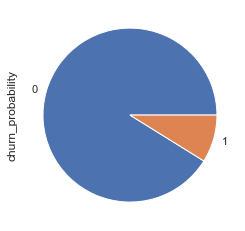

In [74]:
# lets find out churn/non churn percentage
print((df['churn_probability'].value_counts()/len(df))*100)
((df['churn_probability'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

From the above, we can infer that based on the data set, less than 10 percent of the customers would chrun and rest do not. 

There is definitely an imbalance here, which we need to handle. We will first perform the EDA and then before going in for Modelling, we will handle the imbalance. 

# EDA

## Deriving new variables to understand the data¶

In [75]:
# creating a new variable 'tenure'
df['tenure'] = (df['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
df.drop('aon',axis=1, inplace=True)

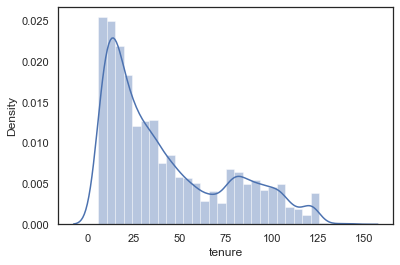

In [76]:
# Checking the distribution of he tenure variable

sns.distplot(df['tenure'],bins=30)
plt.show()

In [77]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels=tn_label)
df['tenure_range'].head()

12    6-12 Months
15    1-2 Yrs    
23    1-2 Yrs    
24    2-5 Yrs    
25    NaN        
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

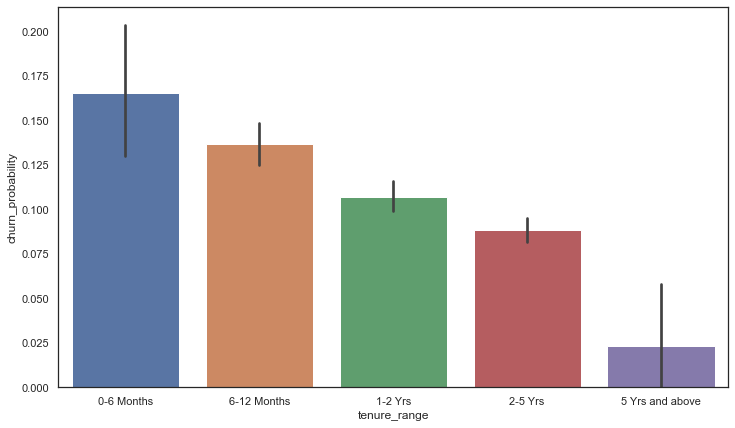

In [78]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=df)
plt.show()

The maximum churn happens within 6 months and later on it reduces. 


In [79]:
#let us create a new field for the average of 6 and 7 months revenuew 

df["avg_arpu_6_7"]= (df['arpu_6']+df['arpu_7'])/2
df['avg_arpu_6_7'].head()

12    418.9325 
15    478.9215 
23    1018.2270
24    362.0215 
25    342.3570 
Name: avg_arpu_6_7, dtype: float64

In [80]:
df.shape

(21018, 127)

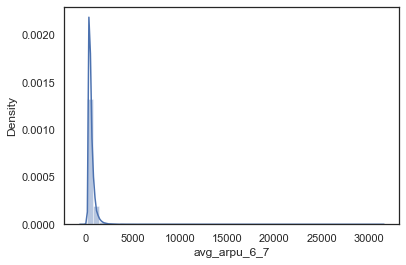

In [81]:
# Visualizing the column created
sns.distplot(df['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

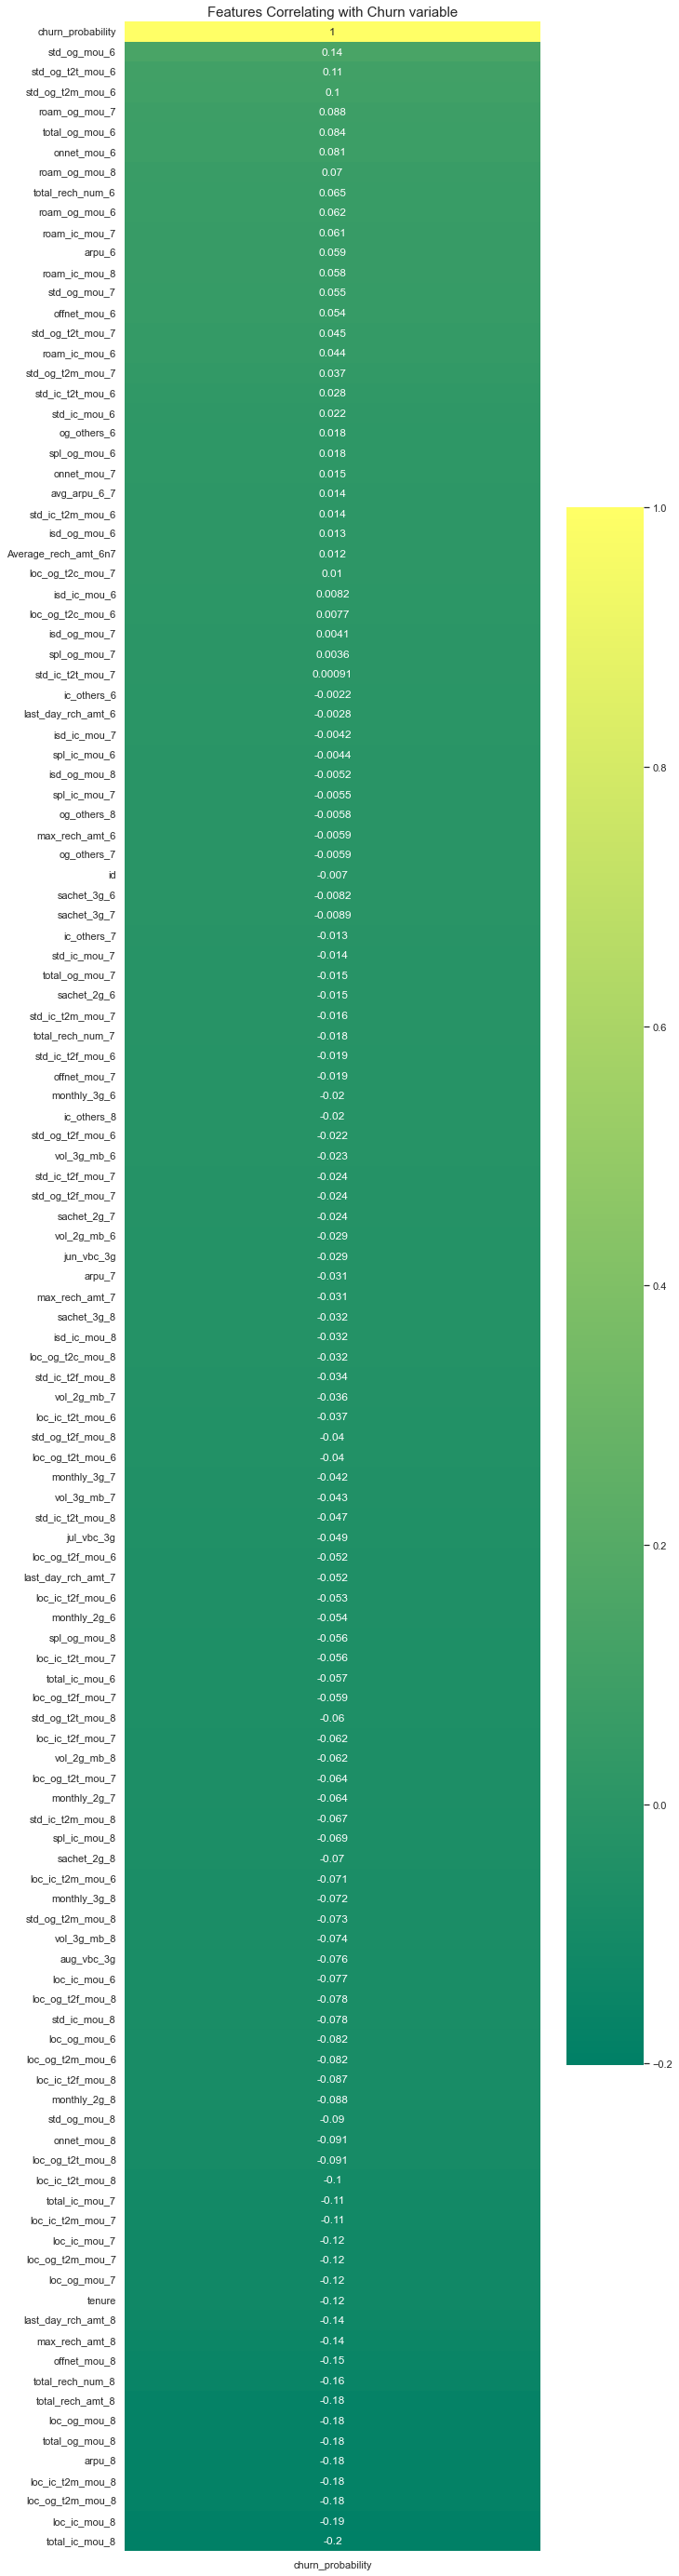

In [82]:
# checking the correlation
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


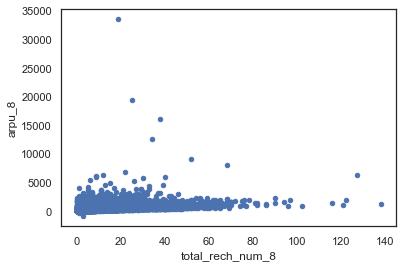

In [83]:
##lets see the relationship between recharge and churn

##recharge and average revenue for 8 months

df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

It is clear that as the recharge rate increases, the churn probability reduces

In [84]:
df.shape

(21018, 127)

In [85]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 127 columns):
 #    Column                Dtype   
---   ------                -----   
 0    id                    int64   
 1    arpu_6                float64 
 2    arpu_7                float64 
 3    arpu_8                float64 
 4    onnet_mou_6           float64 
 5    onnet_mou_7           float64 
 6    onnet_mou_8           float64 
 7    offnet_mou_6          float64 
 8    offnet_mou_7          float64 
 9    offnet_mou_8          float64 
 10   roam_ic_mou_6         float64 
 11   roam_ic_mou_7         float64 
 12   roam_ic_mou_8         float64 
 13   roam_og_mou_6         float64 
 14   roam_og_mou_7         float64 
 15   roam_og_mou_8         float64 
 16   loc_og_t2t_mou_6      float64 
 17   loc_og_t2t_mou_7      float64 
 18   loc_og_t2t_mou_8      float64 
 19   loc_og_t2m_mou_6      float64 
 20   loc_og_t2m_mou_7      float64 
 21   loc_og_t2m_mou_8      float64 
 

In [86]:
df = df.drop(["tenure_range" ], axis=1)


In [87]:
print(df.shape)
print(df.isnull().sum())

(21018, 126)
id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0

In [88]:
# keeping the original df for copy  future reference
df_original = df

In [89]:
df.shape

(21018, 126)

In [90]:
df_train , df_test = train_test_split(df , train_size = 0.7 , random_state = 100)

In [91]:
y_train = df_train.pop('churn_probability')
X_train = df_train


y_test = df_test.pop('churn_probability')
X_test = df_test

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, train_size=0.7, random_state=42)

In [93]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6n7,tenure,avg_arpu_6_7
0,67305,265.578,508.581,558.926,3.54,15.08,43.38,37.54,367.08,235.11,0.00,0.00,0.00,0.00,0.00,0.00,3.54,13.41,39.91,3.31,26.73,27.89,0.00,0.00,0.00,0.0,0.0,0.00,6.86,40.14,67.81,0.00,1.66,3.46,33.14,338.48,207.21,0.00,0.00,0.00,33.14,340.14,210.68,0.00,0.00,0.0,1.08,1.86,0.00,0.0,0.0,0.0,41.09,382.16,278.49,39.18,37.74,32.41,24.38,59.16,58.49,0.00,0.43,4.68,63.56,97.34,95.59,1.26,0.00,0.00,0.46,229.66,158.69,0.00,0.00,0.00,1.73,229.66,158.69,66.71,327.01,254.29,0.21,0.00,0.0,0.00,0.00,0.00,1.20,0.0,0.00,17,25,31,645,56,67,30,56,17,20,0.00,2.77,96.76,555.45,485.39,219.21,0,0,0,8,3,5,0,0,0,0,0,0,0.00,115.56,0.0,441.5,50.0,387.0795
1,4937,182.700,543.680,396.850,23.78,97.74,34.41,172.46,497.99,329.71,10.33,0.51,0.00,1.78,1.74,0.00,17.89,45.18,34.41,103.34,410.04,160.89,48.43,28.78,151.33,0.0,0.0,0.16,169.68,484.01,346.64,5.71,52.56,0.00,7.61,20.48,12.04,10.99,17.03,5.26,24.33,90.08,17.31,0.45,10.24,0.0,0.00,12.28,0.16,0.0,0.0,0.0,194.46,596.63,364.13,4.06,36.28,48.74,142.21,475.69,490.59,50.56,3.18,19.53,196.84,515.16,558.88,0.00,0.19,0.00,9.53,36.93,9.04,11.56,16.74,0.00,21.10,53.88,9.04,220.71,652.24,777.34,0.00,0.00,0.0,2.76,73.19,153.44,0.00,10.0,55.96,6,6,6,423,250,565,400,0,0,23,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,407.5,122.0,363.1900
2,18431,808.137,732.148,436.707,130.69,117.96,95.08,310.68,700.74,435.58,0.00,0.00,0.00,0.00,0.00,0.00,129.89,117.96,93.19,245.53,596.18,379.16,49.53,97.41,51.98,0.5,0.0,0.00,424.96,811.56,524.34,0.80,0.00,1.88,9.68,7.14,4.43,0.00,0.00,0.00,10.48,7.14,6.31,0.00,0.00,0.0,5.93,0.00,0.00,0.0,0.0,0.0,441.38,818.71,530.66,62.26,107.08,80.91,147.24,215.03,176.36,37.63,58.19,41.51,247.14,380.31,298.79,0.73,3.84,1.93,10.99,5.74,9.35,0.00,0.00,1.61,11.73,9.59,12.89,259.74,389.91,312.93,0.00,0.00,0.0,0.00,0.00,0.00,0.86,0.0,1.23,11,11,6,508,252,128,150,252,128,150,261.93,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,13.89,49.73,0.0,907.5,119.0,770.1425
3,43085,336.018,567.765,626.251,359.61,996.54,907.34,24.24,25.03,38.04,13.63,0.00,0.00,5.43,0.00,0.00,3.93,11.28,20.83,18.68,18.78,26.48,0.00,0.81,0.00,0.0,0.0,0.00,22.61,30.88,47.31,351.31,985.26,886.51,4.40,5.43,0.00,0.00,0.00,0.00,355.71,990.69,886.51,0.00,0.00,0.0,

Standardizing Columns

In [94]:
# columns with numerical data
condition1 = df_train.dtypes == 'int'
condition2 = df_train.dtypes == 'float'
numerical_vars = df_train.columns[condition1 | condition2].to_list()

In [95]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [96]:
round(X_train_resampled.describe(),2)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6n7,tenure,avg_arpu_6_7
count,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00,18716.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1

Model 1 : Interpretable Model : Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [98]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [99]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [100]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[7550 1808]
 [ 160  780]]

Confusion Matrix for test: 
 [[2858 1166]
 [  52  338]]


In [101]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_stats(train_matrix)

print('\n\nTest Performance : \n')
model_stats(test_matrix)

Train Performance : 

Accuracy : 0.809
Sensitivity / True Positive Rate / Recall : 0.83
Specificity / True Negative Rate :  0.807
Precision / Positive Predictive Value : 0.301
F1-score : 0.442


Test Performance : 

Accuracy : 0.724
Sensitivity / True Positive Rate / Recall : 0.867
Specificity / True Negative Rate :  0.71
Precision / Positive Predictive Value : 0.225
F1-score : 0.357


In [102]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
67305,1,1,1,0,0,0,0,0,0,0
4937,1,0,0,0,0,0,0,0,0,0
18431,1,1,0,0,0,0,0,0,0,0
43085,1,1,1,1,0,0,0,0,0,0
66637,1,1,0,0,0,0,0,0,0,0


In [103]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])


def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy


for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.091
0.1,0.967,0.314,0.373
0.2,0.949,0.471,0.514
0.3,0.923,0.608,0.636
0.4,0.884,0.712,0.728
0.5,0.830,0.807,0.809
0.6,0.764,0.878,0.868
0.7,0.669,0.925,0.902
0.8,0.402,0.960,0.909
0.9,0.181,0.985,0.912


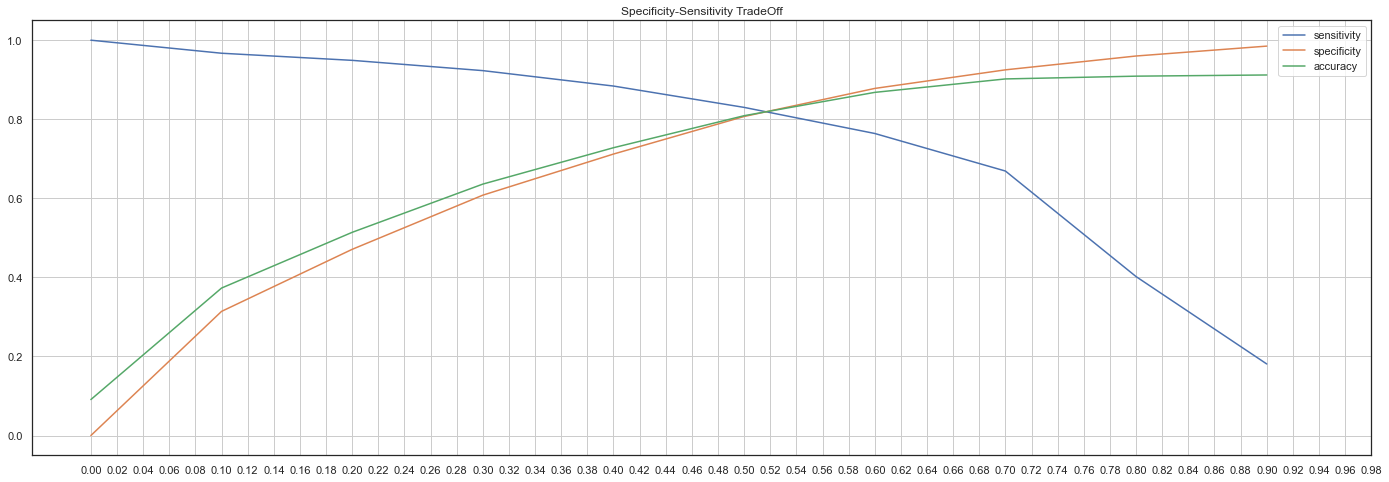

In [104]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

As we can observe the optimal cutoff of specificity-sentivity is 0.51 so lets use it and try to find the confuse matrix

In [105]:
optimum_cutoff = 0.51
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[7614 1744]
 [ 168  772]]

Confusion Matrix for test: 
 [[4024    0]
 [ 389    1]]


In [106]:
print('Train Performance: \n')
model_stats(train_matrix)

print('\n\nTest Performance : \n')
model_stats(test_matrix)

Train Performance: 

Accuracy : 0.814
Sensitivity / True Positive Rate / Recall : 0.821
Specificity / True Negative Rate :  0.814
Precision / Positive Predictive Value : 0.307
F1-score : 0.447


Test Performance : 

Accuracy : 0.912
Sensitivity / True Positive Rate / Recall : 0.003
Specificity / True Negative Rate :  1.0
Precision / Positive Predictive Value : 1.0
F1-score : 0.006


In [107]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.885 

ROC AUC score for Test :  0.873


In [108]:
# feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr,step=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True])

In [109]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : df_train.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
62,loc_ic_t2f_mou_7,1,True
69,std_ic_t2t_mou_8,1,True
68,std_ic_t2t_mou_7,1,True
67,std_ic_t2t_mou_6,1,True
66,loc_ic_mou_8,1,True
64,loc_ic_mou_6,1,True
63,loc_ic_t2f_mou_8,1,True
123,tenure,1,True
71,std_ic_t2m_mou_7,1,True
61,loc_ic_t2f_mou_6,1,True


In [110]:
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'Average_rech_amt_6n7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'avg_arpu_6_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'arpu_7',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og

Logistic Regression with RFE Selected Columns

In [111]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18654
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 01 Apr 2023   Deviance:                   2.9823e+05
Time:                        16:14:54   Pearson chi2:                 1.46e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.231e+14   4.91e+05  -6.59e+08      0.000   -3.23e+14   -3.23e+14
loc_ic_t2f_mou_7     -9.004e+13   9.35e+05  -9.63e+07      0.000      -9e+13      -9e+13
std_ic_t2t_mou_8     -7.765e+13    2.9e+06  -2.68e+07      0.000   -7.76e+13   -7.76e+13
std_ic_t2t_mou_7     -2.682e+13   9.21e+05  -2.91e+07      0.000   -2.68e+13   -2.68e+13
std_ic_t2t_mou_6      7.982e+13    7.5e+05   1.06e+08      0.000    7.98e+13    7.98e+13
loc_ic_mou_8         -3.083e+14   1.01e+07  -3.07e+07      0.000   -3.08e+14   -3.08e+14
loc_ic_mou_6          1.401e+18   2.37e+10    5.9e+07      0.000     1.4e+18     1.4e+18
loc_ic_t2f_mou_8      2.032e+13   8.16e+05   2.49e+07      0.000    2.03e+13    2.03e+13
tenure               -7.019e+13    5.4e+05   -1.3e+08      0.000   -7.02e+13   -7.02e+13
std_ic_t2m_mou_7     -7.073e+13    8.5e+05  -8.32e+07      0.000   -7.07e+13   -7.07e+13
loc_ic_t2f_mou_6     -1.833e+17   3.11e+09   -5.9e+07      0.000   -1.83e+17   -1.83e+17
loc_ic_t2m_mou_6     -9.669e+17   1.64e+10   -5.9e+07      0.000   -9.67e+17   -9.67e+17
loc_ic_t2t_mou_6     -6.846e+17   1.16e+10   -5.9e+07      0.000   -6.85e+17   -6.85e+17
spl_og_mou_8         -1.033e+14   7.65e+05  -1.35e+08      0.000   -1.03e+14   -1.03e+14
spl_og_mou_7          2.149e+13   9.02e+05   2.38e+07      0.000    2.15e+13    2.15e+13
isd_og_mou_8          2.149e+14   2.46e+06   8.75e+07      0.000    2.15e+14    2.15e+14
isd_og_mou_7         -1.181e+14   2.47e+06  -4.79e+07      0.000   -1.18e+14   -1.18e+14
isd_og_mou_6         -1.887e+13   1.66e+06  -1.14e+07      0.000   -1.89e+13   -1.89e+13
loc_ic_t2m_mou_7      4.769e+13   1.18e+06   4.04e+07      0.000    4.77e+13    4.77e+13
std_og_mou_8         -1.709e+13   1.32e+06  -1.29e+07      0.000   -1.71e+13   -1.71e+13
std_ic_t2m_mou_8      1.274e+14   3.92e+06   3.25e+07      0.000    1.27e+14    1.27e+14
std_ic_t2f_mou_7     -3.134e+13   8.01e+05  -3.91e+07      0.000   -3.13e+13   -3.13e+13
Average_rech_amt_6n7 -3.988e+14   2.87e+06  -1.39e+08      0.000   -3.99e+14   -3.99e+14
vol_3g_mb_8          -1.779e+14    5.4e+05  -3.29e+08      0.000   -1.78e+14   -1.78e+14
vol_2g_mb_8          -1.318e+14      5e+05  -2.63e+08      0.000   -1.32e+14   -1.32e+14
last_day_rch_amt_8   -1.481e+14   7.02e+05  -2.11e+08      0.000   -1.48e+14   -1.48e+14
max_rech_amt_8       -3.048e+13   8.98e+05  -3.39e+07      0.000   -3.05e+13   -3.05e+13
max_rech_amt_7        6.223e+13   7.25e+05   8.59e+07      0.000    6.22e+13    6.22e+13
max_rech_amt_6        5.321e+13   6.86e+05   7.76e+07      0.000    5.32e+13    5.32e+13
std_ic_t2f_mou_6      2.804e+13   7.01e+05      4e+07      0.000     2.8e+13     2.8e+13
total_rech_amt_8     -1.205e+13   1.52e+06  -7.91e+06      0.000   -1.21e+13   -1.21e+13
total_rech_num_7      1.124e+14   9.82e+05   1.14e+08    

In [112]:


fetch_vif(X_train_resampled, logr_fit, rfe_selected_columns)


,VIF,P-value
Features,,
avg_arpu_6_7,inf,0.0
arpu_7,inf,0.0
arpu_6,inf,0.0
std_og_mou_7,2.018832e+10,0.0
std_og_t2m_mou_7,9.915739e+09,0.0
std_og_t2t_mou_7,9.119460e+09,0.0
loc_ic_t2m_mou_6,1.115550e+09,0.0
loc_ic_t2t_mou_6,5.592257e+08,0.0
loc_ic_t2f_mou_6,4.014215e+07,0.0


selected_columns = rfe_selected_columns
selected_columns.remove('total_og_mou_7')
selected_columns

Model

In [113]:
selected_columns = rfe_selected_columns
selected_columns.remove('avg_arpu_6_7')
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'Average_rech_amt_6n7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'arpu_7',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'lo

In [114]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18654
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7229.8
Date:                Sat, 01 Apr 2023   Deviance:                       14460.
Time:                        16:15:28   Pearson chi2:                 1.76e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4587
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4358      0.026    -16.501      0.000      -0.488      -0.384
loc_ic_t2f_mou_7        -0.2409      0.060     -4.009      0.000      -0.359      -0.123
std_ic_t2t_mou_8        -0.1989      0.256     -0.778      0.437      -0.700       0.302
std_ic_t2t_mou_7        -0.0109      0.065     -0.168      0.866      -0.138       0.116
std_ic_t2t_mou_6         0.1656      0.041      4.026      0.000       0.085       0.246
loc_ic_mou_8            -1.0465      0.834     -1.254      0.210      -2.682       0.589
loc_ic_mou_6          -698.0057   1023.657     -0.682      0.495   -2704.336    1308.325
loc_ic_t2f_mou_8         0.0106      0.068      0.158      0.875      -0.122       0.143
tenure                  -0.3484      0.025    -13.907      0.000      -0.398      -0.299
std_ic_t2m_mou_7        -0.2199      0.048     -4.561      0.000      -0.314      -0.125
loc_ic_t2f_mou_6        91.6349    134.058      0.684      0.494    -171.114     354.384
loc_ic_t2m_mou_6       482.0261    706.705      0.682      0.495    -903.091    1867.143
loc_ic_t2t_mou_6       341.2000    500.365      0.682      0.495    -639.498    1321.898
spl_og_mou_8            -0.2097      0.050     -4.194      0.000      -0.308      -0.112
spl_og_mou_7             0.0070      0.042      0.168      0.867      -0.075       0.089
isd_og_mou_8             0.5528      0.125      4.415      0.000       0.307       0.798
isd_og_mou_7            -0.1640      0.130     -1.264      0.206      -0.418       0.090
isd_og_mou_6            -0.1265      0.087     -1.452      0.147      -0.297       0.044
loc_ic_t2m_mou_7         0.0702      0.080      0.874      0.382      -0.087       0.228
std_og_mou_8            -0.2057      0.066     -3.120      0.002      -0.335      -0.076
std_ic_t2m_mou_8         0.3904      0.334      1.169      0.242      -0.264       1.045
std_ic_t2f_mou_7        -0.0179      0.049     -0.362      0.717      -0.115       0.079
Average_rech_amt_6n7    -0.9823      0.135     -7.252      0.000      -1.248      -0.717
vol_3g_mb_8             -0.5178      0.042    -12.203      0.000      -0.601      -0.435
vol_2g_mb_8             -0.4077      0.039    -10.532      0.000      -0.484      -0.332
last_day_rch_amt_8      -0.6382      0.040    -16.102      0.000      -0.716      -0.561
max_rech_amt_8           0.0339      0.044      0.771      0.441      -0.052       0.120
max_rech_amt_7           0.1784      0.033      5.471      0.000       0.114       0.242
max_rech_amt_6           0.1409      0.032      4.414      0.000       0.078       0.203
std_ic_t2f_mou_6         0.0116      0.044      0.265      0.791      -0.074       0.098
total_rech_amt_8        -0.2032      0.075     -2.698      0.007      -0.351      -0.056
total_rech_num_7         0.4193      0.047      8.959    

In [115]:
# vif and p-values
fetch_vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.018832e+10,0.2456
std_og_t2m_mou_7,9.915739e+09,0.2456
std_og_t2t_mou_7,9.119460e+09,0.2456
loc_ic_mou_6,2.340576e+09,0.4953
loc_ic_t2m_mou_6,1.115550e+09,0.4952
loc_ic_t2t_mou_6,5.592257e+08,0.4953
loc_ic_t2f_mou_6,4.014215e+07,0.4943
std_og_t2f_mou_7,4.428590e+06,0.2448
total_ic_mou_8,6.128600e+02,0.4213


selected_columns.remove('max_rech_amt_8')
selected_columns

logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

# vif and p-values
fetch_vif(X_train_resampled, logr3_fit, selected_columns)

In [116]:
selected_columns.remove('arpu_6')
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'Average_rech_amt_6n7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'arpu_7',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'lo

In [117]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18655
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7260.2
Date:                Sat, 01 Apr 2023   Deviance:                       14520.
Time:                        16:15:57   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4569
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4446      0.026    -16.823      0.000      -0.496      -0.393
loc_ic_t2f_mou_7        -0.2437      0.060     -4.090      0.000      -0.361      -0.127
std_ic_t2t_mou_8        -0.2772      0.238     -1.166      0.244      -0.743       0.189
std_ic_t2t_mou_7         0.0015      0.065      0.023      0.981      -0.126       0.129
std_ic_t2t_mou_6         0.1702      0.041      4.119      0.000       0.089       0.251
loc_ic_mou_8            -1.1347      0.821     -1.382      0.167      -2.744       0.474
loc_ic_mou_6          -292.3385   1019.382     -0.287      0.774   -2290.291    1705.614
loc_ic_t2f_mou_8         0.0123      0.067      0.184      0.854      -0.119       0.144
tenure                  -0.3503      0.025    -14.026      0.000      -0.399      -0.301
std_ic_t2m_mou_7        -0.2045      0.049     -4.191      0.000      -0.300      -0.109
loc_ic_t2f_mou_6        38.5181    133.498      0.289      0.773    -223.134     300.170
loc_ic_t2m_mou_6       201.9979    703.755      0.287      0.774   -1177.336    1581.332
loc_ic_t2t_mou_6       142.9234    498.276      0.287      0.774    -833.680    1119.527
spl_og_mou_8            -0.2136      0.050     -4.280      0.000      -0.311      -0.116
spl_og_mou_7             0.0034      0.042      0.081      0.936      -0.079       0.086
isd_og_mou_8             0.5123      0.130      3.955      0.000       0.258       0.766
isd_og_mou_7            -0.3133      0.128     -2.450      0.014      -0.564      -0.063
isd_og_mou_6             0.0538      0.075      0.713      0.476      -0.094       0.202
loc_ic_t2m_mou_7         0.0730      0.081      0.898      0.369      -0.086       0.232
std_og_mou_8            -0.2188      0.066     -3.304      0.001      -0.349      -0.089
std_ic_t2m_mou_8         0.2732      0.309      0.885      0.376      -0.332       0.878
std_ic_t2f_mou_7        -0.0242      0.050     -0.486      0.627      -0.122       0.073
Average_rech_amt_6n7    -0.1576      0.083     -1.891      0.059      -0.321       0.006
vol_3g_mb_8             -0.4947      0.042    -11.877      0.000      -0.576      -0.413
vol_2g_mb_8             -0.4028      0.039    -10.456      0.000      -0.478      -0.327
last_day_rch_amt_8      -0.6374      0.040    -16.041      0.000      -0.715      -0.560
max_rech_amt_8           0.0747      0.045      1.678      0.093      -0.013       0.162
max_rech_amt_7           0.1106      0.032      3.512      0.000       0.049       0.172
max_rech_amt_6           0.1317      0.031      4.264      0.000       0.071       0.192
std_ic_t2f_mou_6         0.0094      0.044      0.211      0.833      -0.078       0.096
total_rech_amt_8        -0.1855      0.080     -2.329      0.020      -0.342      -0.029
total_rech_num_7         0.3539      0.046      7.693    

In [118]:
fetch_vif(X_train_resampled, logr4_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.018809e+10,0.2214
std_og_t2m_mou_7,9.915619e+09,0.2215
std_og_t2t_mou_7,9.119340e+09,0.2215
loc_ic_mou_6,2.336351e+09,0.7743
loc_ic_t2m_mou_6,1.113537e+09,0.7741
loc_ic_t2t_mou_6,5.582163e+08,0.7742
loc_ic_t2f_mou_6,4.006971e+07,0.7729
std_og_t2f_mou_7,4.428533e+06,0.2207
total_ic_mou_8,6.128000e+02,0.4669


In [119]:
selected_columns.remove('max_rech_amt_8')
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'Average_rech_amt_6n7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'arpu_7',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2t_mou_8',
 '

In [120]:
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
logr5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18656
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7261.6
Date:                Sat, 01 Apr 2023   Deviance:                       14523.
Time:                        16:16:27   Pearson chi2:                 2.01e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4568
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4397      0.026    -16.775      0.000      -0.491      -0.388
loc_ic_t2f_mou_7        -0.2459      0.060     -4.113      0.000      -0.363      -0.129
std_ic_t2t_mou_8        -0.2667      0.239     -1.114      0.265      -0.736       0.203
std_ic_t2t_mou_7         0.0017      0.065      0.026      0.979      -0.125       0.129
std_ic_t2t_mou_6         0.1701      0.041      4.128      0.000       0.089       0.251
loc_ic_mou_8            -1.1591      0.803     -1.443      0.149      -2.733       0.415
loc_ic_mou_6          -290.2695   1019.334     -0.285      0.776   -2288.128    1707.589
loc_ic_t2f_mou_8         0.0096      0.067      0.143      0.886      -0.122       0.141
tenure                  -0.3489      0.025    -13.977      0.000      -0.398      -0.300
std_ic_t2m_mou_7        -0.2050      0.049     -4.197      0.000      -0.301      -0.109
loc_ic_t2f_mou_6        38.2492    133.492      0.287      0.774    -223.390     299.889
loc_ic_t2m_mou_6       200.5697    703.722      0.285      0.776   -1178.700    1579.839
loc_ic_t2t_mou_6       141.9115    498.253      0.285      0.776    -834.646    1118.469
spl_og_mou_8            -0.2124      0.050     -4.257      0.000      -0.310      -0.115
spl_og_mou_7             0.0035      0.042      0.083      0.934      -0.079       0.086
isd_og_mou_8             0.4813      0.131      3.672      0.000       0.224       0.738
isd_og_mou_7            -0.3017      0.130     -2.317      0.021      -0.557      -0.046
isd_og_mou_6             0.0605      0.076      0.795      0.427      -0.089       0.210
loc_ic_t2m_mou_7         0.0729      0.081      0.897      0.369      -0.086       0.232
std_og_mou_8            -0.2323      0.066     -3.513      0.000      -0.362      -0.103
std_ic_t2m_mou_8         0.2874      0.311      0.924      0.356      -0.322       0.897
std_ic_t2f_mou_7        -0.0223      0.050     -0.449      0.654      -0.119       0.075
Average_rech_amt_6n7    -0.1834      0.082     -2.227      0.026      -0.345      -0.022
vol_3g_mb_8             -0.4885      0.042    -11.750      0.000      -0.570      -0.407
vol_2g_mb_8             -0.3992      0.038    -10.396      0.000      -0.474      -0.324
last_day_rch_amt_8      -0.6251      0.040    -15.724      0.000      -0.703      -0.547
max_rech_amt_7           0.1247      0.031      4.084      0.000       0.065       0.185
max_rech_amt_6           0.1446      0.030      4.803      0.000       0.086       0.204
std_ic_t2f_mou_6         0.0089      0.044      0.200      0.842      -0.078       0.096
total_rech_amt_8        -0.1148      0.074     -1.555      0.120      -0.259       0.030
total_rech_num_7         0.3553      0.046      7.725      0.000       0.265       0.445
total_rech_num_6         0.1149      0.037      3.134    

In [121]:
fetch_vif(X_train_resampled, logr5_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.014903e+10,0.1951
std_og_t2m_mou_7,9.896433e+09,0.1952
std_og_t2t_mou_7,9.101702e+09,0.1952
loc_ic_mou_6,2.336278e+09,0.7758
loc_ic_t2m_mou_6,1.113502e+09,0.7756
loc_ic_t2t_mou_6,5.581991e+08,0.7758
loc_ic_t2f_mou_6,4.006848e+07,0.7745
std_og_t2f_mou_7,4.419966e+06,0.1944
total_ic_mou_8,6.124400e+02,0.4788


In [122]:
selected_columns.remove('total_rech_num_6')
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'Average_rech_amt_6n7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'arpu_7',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2t_mou_8',
 'std_og_t2f_mou_7',
 '

In [123]:
logr6 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr6_fit = logr6.fit()
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18657
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7266.6
Date:                Sat, 01 Apr 2023   Deviance:                       14533.
Time:                        16:16:54   Pearson chi2:                 1.85e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4565
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4464      0.026    -17.070      0.000      -0.498      -0.395
loc_ic_t2f_mou_7        -0.2461      0.060     -4.122      0.000      -0.363      -0.129
std_ic_t2t_mou_8        -0.2752      0.239     -1.151      0.250      -0.744       0.193
std_ic_t2t_mou_7         0.0018      0.064      0.028      0.978      -0.125       0.128
std_ic_t2t_mou_6         0.1732      0.041      4.210      0.000       0.093       0.254
loc_ic_mou_8            -1.1574      0.820     -1.411      0.158      -2.765       0.450
loc_ic_mou_6          -136.0690   1018.019     -0.134      0.894   -2131.350    1859.212
loc_ic_t2f_mou_8         0.0132      0.067      0.196      0.845      -0.119       0.145
tenure                  -0.3531      0.025    -14.148      0.000      -0.402      -0.304
std_ic_t2m_mou_7        -0.1966      0.048     -4.065      0.000      -0.291      -0.102
loc_ic_t2f_mou_6        18.0566    133.320      0.135      0.892    -243.246     279.359
loc_ic_t2m_mou_6        94.1268    702.814      0.134      0.893   -1283.364    1471.617
loc_ic_t2t_mou_6        66.5411    497.610      0.134      0.894    -908.757    1041.839
spl_og_mou_8            -0.2121      0.050     -4.256      0.000      -0.310      -0.114
spl_og_mou_7             0.0088      0.042      0.210      0.834      -0.073       0.091
isd_og_mou_8             0.4811      0.131      3.677      0.000       0.225       0.738
isd_og_mou_7            -0.2674      0.130     -2.052      0.040      -0.523      -0.012
isd_og_mou_6             0.0139      0.077      0.180      0.857      -0.138       0.166
loc_ic_t2m_mou_7         0.0704      0.081      0.864      0.387      -0.089       0.230
std_og_mou_8            -0.2377      0.066     -3.589      0.000      -0.368      -0.108
std_ic_t2m_mou_8         0.2772      0.311      0.892      0.372      -0.332       0.886
std_ic_t2f_mou_7        -0.0221      0.050     -0.446      0.656      -0.119       0.075
Average_rech_amt_6n7    -0.0596      0.073     -0.817      0.414      -0.202       0.083
vol_3g_mb_8             -0.4834      0.041    -11.658      0.000      -0.565      -0.402
vol_2g_mb_8             -0.4009      0.038    -10.421      0.000      -0.476      -0.325
last_day_rch_amt_8      -0.6249      0.040    -15.563      0.000      -0.704      -0.546
max_rech_amt_7           0.1087      0.030      3.597      0.000       0.049       0.168
max_rech_amt_6           0.1241      0.029      4.208      0.000       0.066       0.182
std_ic_t2f_mou_6         0.0081      0.045      0.181      0.856      -0.080       0.096
total_rech_amt_8        -0.1226      0.075     -1.631      0.103      -0.270       0.025
total_rech_num_7         0.4105      0.042      9.693      0.000       0.327       0.493
isd_ic_mou_8            -0.2031      0.223     -0.912    

In [124]:
fetch_vif(X_train_resampled, logr6_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.014245e+10,0.2275
std_og_t2m_mou_7,9.893205e+09,0.2275
std_og_t2t_mou_7,9.098742e+09,0.2275
loc_ic_mou_6,2.330899e+09,0.8937
loc_ic_t2m_mou_6,1.110939e+09,0.8935
loc_ic_t2t_mou_6,5.569139e+08,0.8936
loc_ic_t2f_mou_6,3.997624e+07,0.8923
std_og_t2f_mou_7,4.418524e+06,0.2267
total_ic_mou_8,6.124400e+02,0.4771


In [125]:
selected_columns.remove('Average_rech_amt_6n7')
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'arpu_7',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2t_mou_8',
 'std_og_t2f_mou_7',
 'offnet_mou_8',
 'std_og_t

In [126]:
logr7 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr7_fit = logr7.fit()
logr7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18658
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7267.0
Date:                Sat, 01 Apr 2023   Deviance:                       14534.
Time:                        16:17:20   Pearson chi2:                 1.84e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4565
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4453      0.026    -17.058      0.000      -0.496      -0.394
loc_ic_t2f_mou_7      -0.2461      0.060     -4.121      0.000      -0.363      -0.129
std_ic_t2t_mou_8      -0.2767      0.239     -1.159      0.246      -0.745       0.191
std_ic_t2t_mou_7       0.0033      0.065      0.052      0.959      -0.123       0.130
std_ic_t2t_mou_6       0.1709      0.041      4.156      0.000       0.090       0.251
loc_ic_mou_8          -1.1564      0.820     -1.409      0.159      -2.764       0.452
loc_ic_mou_6        -208.2768   1014.361     -0.205      0.837   -2196.387    1779.834
loc_ic_t2f_mou_8       0.0136      0.067      0.202      0.840      -0.118       0.145
tenure                -0.3519      0.025    -14.127      0.000      -0.401      -0.303
std_ic_t2m_mou_7      -0.1985      0.048     -4.110      0.000      -0.293      -0.104
loc_ic_t2f_mou_6      27.5120    132.841      0.207      0.836    -232.851     287.875
loc_ic_t2m_mou_6     143.9689    700.289      0.206      0.837   -1228.573    1516.511
loc_ic_t2t_mou_6     101.8336    495.822      0.205      0.837    -869.960    1073.627
spl_og_mou_8          -0.2113      0.050     -4.247      0.000      -0.309      -0.114
spl_og_mou_7           0.0091      0.042      0.217      0.828      -0.073       0.091
isd_og_mou_8           0.4905      0.130      3.774      0.000       0.236       0.745
isd_og_mou_7          -0.2567      0.129     -1.983      0.047      -0.510      -0.003
isd_og_mou_6          -0.0116      0.071     -0.163      0.871      -0.151       0.128
loc_ic_t2m_mou_7       0.0739      0.081      0.910      0.363      -0.085       0.233
std_og_mou_8          -0.2357      0.066     -3.560      0.000      -0.366      -0.106
std_ic_t2m_mou_8       0.2748      0.310      0.886      0.376      -0.333       0.883
std_ic_t2f_mou_7      -0.0223      0.050     -0.451      0.652      -0.119       0.075
vol_3g_mb_8           -0.4820      0.041    -11.645      0.000      -0.563      -0.401
vol_2g_mb_8           -0.4004      0.038    -10.410      0.000      -0.476      -0.325
last_day_rch_amt_8    -0.6209      0.040    -15.552      0.000      -0.699      -0.543
max_rech_amt_7         0.1057      0.030      3.517      0.000       0.047       0.165
max_rech_amt_6         0.1164      0.028      4.160      0.000       0.062       0.171
std_ic_t2f_mou_6       0.0082      0.045      0.184      0.854      -0.079       0.096
total_rech_amt_8      -0.1334      0.074     -1.794      0.073      -0.279       0.012
total_rech_num_7       0.4084      0.042      9.666      0.000       0.326       0.491
isd_ic_mou_8          -0.2042      0.223     -0.917      0.359      -0.641       0.232
isd_ic_mou_7           0.2256      0.047      4.767      0.000       0.133       0.318
total_ic_mou_8        -0.6996      0.9

In [127]:
fetch_vif(X_train_resampled, logr7_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.011272e+10,0.2105
std_og_t2m_mou_7,9.878590e+09,0.2105
std_og_t2t_mou_7,9.085296e+09,0.2105
loc_ic_mou_6,2.308058e+09,0.8373
loc_ic_t2m_mou_6,1.100055e+09,0.8371
loc_ic_t2t_mou_6,5.514568e+08,0.8373
loc_ic_t2f_mou_6,3.958454e+07,0.8359
std_og_t2f_mou_7,4.412002e+06,0.2098
total_ic_mou_8,6.124100e+02,0.4775


In [128]:
selected_columns.remove('arpu_7')
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2t_mou_8',
 'std_og_t2f_mou_7',
 'offnet_mou_8',
 'std_og_t2f_mou_6',


In [129]:
logr8 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr8_fit = logr8.fit()
logr8_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18659
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7271.2
Date:                Sat, 01 Apr 2023   Deviance:                       14542.
Time:                        16:17:45   Pearson chi2:                 2.21e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4563
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4445      0.026    -17.037      0.000      -0.496      -0.393
loc_ic_t2f_mou_7      -0.2449      0.060     -4.115      0.000      -0.362      -0.128
std_ic_t2t_mou_8      -0.3003      0.235     -1.276      0.202      -0.761       0.161
std_ic_t2t_mou_7       0.0014      0.065      0.021      0.983      -0.125       0.128
std_ic_t2t_mou_6       0.1731      0.041      4.198      0.000       0.092       0.254
loc_ic_mou_8          -1.1446      0.828     -1.382      0.167      -2.767       0.478
loc_ic_mou_6        -277.1150   1013.665     -0.273      0.785   -2263.862    1709.632
loc_ic_t2f_mou_8       0.0121      0.067      0.180      0.857      -0.119       0.144
tenure                -0.3532      0.025    -14.194      0.000      -0.402      -0.304
std_ic_t2m_mou_7      -0.2042      0.049     -4.194      0.000      -0.300      -0.109
loc_ic_t2f_mou_6      36.5243    132.750      0.275      0.783    -223.661     296.709
loc_ic_t2m_mou_6     191.4859    699.809      0.274      0.784   -1180.114    1563.086
loc_ic_t2t_mou_6     135.4839    495.482      0.273      0.785    -835.643    1106.611
spl_og_mou_8          -0.2144      0.050     -4.284      0.000      -0.313      -0.116
spl_og_mou_7           0.0130      0.042      0.310      0.757      -0.069       0.095
isd_og_mou_8           0.3795      0.129      2.938      0.003       0.126       0.633
isd_og_mou_7          -0.1146      0.122     -0.935      0.350      -0.355       0.125
isd_og_mou_6          -0.0284      0.068     -0.415      0.678      -0.163       0.106
loc_ic_t2m_mou_7       0.0865      0.081      1.062      0.288      -0.073       0.246
std_og_mou_8          -0.2777      0.065     -4.299      0.000      -0.404      -0.151
std_ic_t2m_mou_8       0.2443      0.305      0.800      0.423      -0.354       0.843
std_ic_t2f_mou_7      -0.0232      0.049     -0.470      0.638      -0.120       0.073
vol_3g_mb_8           -0.4723      0.041    -11.554      0.000      -0.552      -0.392
vol_2g_mb_8           -0.4007      0.038    -10.426      0.000      -0.476      -0.325
last_day_rch_amt_8    -0.6308      0.039    -16.033      0.000      -0.708      -0.554
max_rech_amt_7         0.1362      0.028      4.837      0.000       0.081       0.191
max_rech_amt_6         0.1285      0.028      4.631      0.000       0.074       0.183
std_ic_t2f_mou_6       0.0084      0.044      0.189      0.850      -0.079       0.095
total_rech_amt_8      -0.0231      0.062     -0.373      0.709      -0.145       0.098
total_rech_num_7       0.4540      0.039     11.522      0.000       0.377       0.531
isd_ic_mou_8          -0.2055      0.225     -0.915      0.360      -0.646       0.235
isd_ic_mou_7           0.2282      0.047      4.810      0.000       0.135       0.321
total_ic_mou_8        -0.7257      0.9

In [130]:
fetch_vif(X_train_resampled, logr8_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.010809e+10,0.1912
std_og_t2m_mou_7,9.876337e+09,0.1912
std_og_t2t_mou_7,9.083226e+09,0.1912
loc_ic_mou_6,2.306791e+09,0.7846
loc_ic_t2m_mou_6,1.099451e+09,0.7844
loc_ic_t2t_mou_6,5.511541e+08,0.7845
loc_ic_t2f_mou_6,3.956282e+07,0.7832
std_og_t2f_mou_7,4.410999e+06,0.1905
total_ic_mou_8,6.123500e+02,0.4654


selected_columns.remove('total_og_mou_8')
selected_columns

In [131]:
logr9 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr9_fit = logr9.fit()
logr9_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18659
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7271.2
Date:                Sat, 01 Apr 2023   Deviance:                       14542.
Time:                        16:18:09   Pearson chi2:                 2.21e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4563
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4445      0.026    -17.037      0.000      -0.496      -0.393
loc_ic_t2f_mou_7      -0.2449      0.060     -4.115      0.000      -0.362      -0.128
std_ic_t2t_mou_8      -0.3003      0.235     -1.276      0.202      -0.761       0.161
std_ic_t2t_mou_7       0.0014      0.065      0.021      0.983      -0.125       0.128
std_ic_t2t_mou_6       0.1731      0.041      4.198      0.000       0.092       0.254
loc_ic_mou_8          -1.1446      0.828     -1.382      0.167      -2.767       0.478
loc_ic_mou_6        -277.1150   1013.665     -0.273      0.785   -2263.862    1709.632
loc_ic_t2f_mou_8       0.0121      0.067      0.180      0.857      -0.119       0.144
tenure                -0.3532      0.025    -14.194      0.000      -0.402      -0.304
std_ic_t2m_mou_7      -0.2042      0.049     -4.194      0.000      -0.300      -0.109
loc_ic_t2f_mou_6      36.5243    132.750      0.275      0.783    -223.661     296.709
loc_ic_t2m_mou_6     191.4859    699.809      0.274      0.784   -1180.114    1563.086
loc_ic_t2t_mou_6     135.4839    495.482      0.273      0.785    -835.643    1106.611
spl_og_mou_8          -0.2144      0.050     -4.284      0.000      -0.313      -0.116
spl_og_mou_7           0.0130      0.042      0.310      0.757      -0.069       0.095
isd_og_mou_8           0.3795      0.129      2.938      0.003       0.126       0.633
isd_og_mou_7          -0.1146      0.122     -0.935      0.350      -0.355       0.125
isd_og_mou_6          -0.0284      0.068     -0.415      0.678      -0.163       0.106
loc_ic_t2m_mou_7       0.0865      0.081      1.062      0.288      -0.073       0.246
std_og_mou_8          -0.2777      0.065     -4.299      0.000      -0.404      -0.151
std_ic_t2m_mou_8       0.2443      0.305      0.800      0.423      -0.354       0.843
std_ic_t2f_mou_7      -0.0232      0.049     -0.470      0.638      -0.120       0.073
vol_3g_mb_8           -0.4723      0.041    -11.554      0.000      -0.552      -0.392
vol_2g_mb_8           -0.4007      0.038    -10.426      0.000      -0.476      -0.325
last_day_rch_amt_8    -0.6308      0.039    -16.033      0.000      -0.708      -0.554
max_rech_amt_7         0.1362      0.028      4.837      0.000       0.081       0.191
max_rech_amt_6         0.1285      0.028      4.631      0.000       0.074       0.183
std_ic_t2f_mou_6       0.0084      0.044      0.189      0.850      -0.079       0.095
total_rech_amt_8      -0.0231      0.062     -0.373      0.709      -0.145       0.098
total_rech_num_7       0.4540      0.039     11.522      0.000       0.377       0.531
isd_ic_mou_8          -0.2055      0.225     -0.915      0.360      -0.646       0.235
isd_ic_mou_7           0.2282      0.047      4.810      0.000       0.135       0.321
total_ic_mou_8        -0.7257      0.9

In [132]:
fetch_vif(X_train_resampled, logr9_fit, selected_columns)

,VIF,P-value
Features,,
std_og_mou_7,2.010809e+10,0.1912
std_og_t2m_mou_7,9.876337e+09,0.1912
std_og_t2t_mou_7,9.083226e+09,0.1912
loc_ic_mou_6,2.306791e+09,0.7846
loc_ic_t2m_mou_6,1.099451e+09,0.7844
loc_ic_t2t_mou_6,5.511541e+08,0.7845
loc_ic_t2f_mou_6,3.956282e+07,0.7832
std_og_t2f_mou_7,4.410999e+06,0.1905
total_ic_mou_8,6.123500e+02,0.4654


In [133]:
logr9_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                18716
Model:                            GLM   Df Residuals:                    18659
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7271.2
Date:                Sat, 01 Apr 2023   Deviance:                       14542.
Time:                        16:18:34   Pearson chi2:                 2.21e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4563
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4445      0.026    -17.037      0.000      -0.496      -0.393
loc_ic_t2f_mou_7      -0.2449      0.060     -4.115      0.000      -0.362      -0.128
std_ic_t2t_mou_8      -0.3003      0.235     -1.276      0.202      -0.761       0.161
std_ic_t2t_mou_7       0.0014      0.065      0.021      0.983      -0.125       0.128
std_ic_t2t_mou_6       0.1731      0.041      4.198      0.000       0.092       0.254
loc_ic_mou_8          -1.1446      0.828     -1.382      0.167      -2.767       0.478
loc_ic_mou_6        -277.1150   1013.665     -0.273      0.785   -2263.862    1709.632
loc_ic_t2f_mou_8       0.0121      0.067      0.180      0.857      -0.119       0.144
tenure                -0.3532      0.025    -14.194      0.000      -0.402      -0.304
std_ic_t2m_mou_7      -0.2042      0.049     -4.194      0.000      -0.300      -0.109
loc_ic_t2f_mou_6      36.5243    132.750      0.275      0.783    -223.661     296.709
loc_ic_t2m_mou_6     191.4859    699.809      0.274      0.784   -1180.114    1563.086
loc_ic_t2t_mou_6     135.4839    495.482      0.273      0.785    -835.643    1106.611
spl_og_mou_8          -0.2144      0.050     -4.284      0.000      -0.313      -0.116
spl_og_mou_7           0.0130      0.042      0.310      0.757      -0.069       0.095
isd_og_mou_8           0.3795      0.129      2.938      0.003       0.126       0.633
isd_og_mou_7          -0.1146      0.122     -0.935      0.350      -0.355       0.125
isd_og_mou_6          -0.0284      0.068     -0.415      0.678      -0.163       0.106
loc_ic_t2m_mou_7       0.0865      0.081      1.062      0.288      -0.073       0.246
std_og_mou_8          -0.2777      0.065     -4.299      0.000      -0.404      -0.151
std_ic_t2m_mou_8       0.2443      0.305      0.800      0.423      -0.354       0.843
std_ic_t2f_mou_7      -0.0232      0.049     -0.470      0.638      -0.120       0.073
vol_3g_mb_8           -0.4723      0.041    -11.554      0.000      -0.552      -0.392
vol_2g_mb_8           -0.4007      0.038    -10.426      0.000      -0.476      -0.325
last_day_rch_amt_8    -0.6308      0.039    -16.033      0.000      -0.708      -0.554
max_rech_amt_7         0.1362      0.028      4.837      0.000       0.081       0.191
max_rech_amt_6         0.1285      0.028      4.631      0.000       0.074       0.183
std_ic_t2f_mou_6       0.0084      0.044      0.189      0.850      -0.079       0.095
total_rech_amt_8      -0.0231      0.062     -0.373      0.709      -0.145       0.098
total_rech_num_7       0.4540      0.039     11.522      0.000       0.377       0.531
isd_ic_mou_8          -0.2055      0.225     -0.915      0.360      -0.646       0.235
isd_ic_mou_7           0.2282      0.047      4.810      0.000       0.135       0.321
total_ic_mou_8        -0.7257      0.9

In [134]:
selected_columns

['loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_8',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'tenure',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_8',
 'spl_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'loc_ic_t2m_mou_7',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'std_ic_t2f_mou_6',
 'total_rech_amt_8',
 'total_rech_num_7',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_7',
 'std_ic_mou_8',
 'total_rech_num_8',
 'std_og_mou_7',
 'onnet_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'std_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2t_mou_8',
 'std_og_t2f_mou_7',
 'offnet_mou_8',
 'std_og_t2f_mou_6',


In [135]:
# Prediction 
y_train_pred_lr = logr9_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.068383
1    0.011233
2    0.031872
3    0.052458
4    0.138637
dtype: float64

In [136]:
y_test_pred_lr = logr9_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

48656    0.857179
22897    0.788745
65793    0.000070
24000    0.572199
8393     0.000001
dtype: float64

In [137]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0


In [138]:
# check the performance of each thread

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.979,0.446,0.713
0.2,0.961,0.588,0.775
0.3,0.938,0.683,0.811
0.4,0.909,0.759,0.834
0.5,0.871,0.821,0.846
0.6,0.817,0.870,0.844
0.7,0.741,0.911,0.826
0.8,0.610,0.944,0.777
0.9,0.274,0.976,0.625


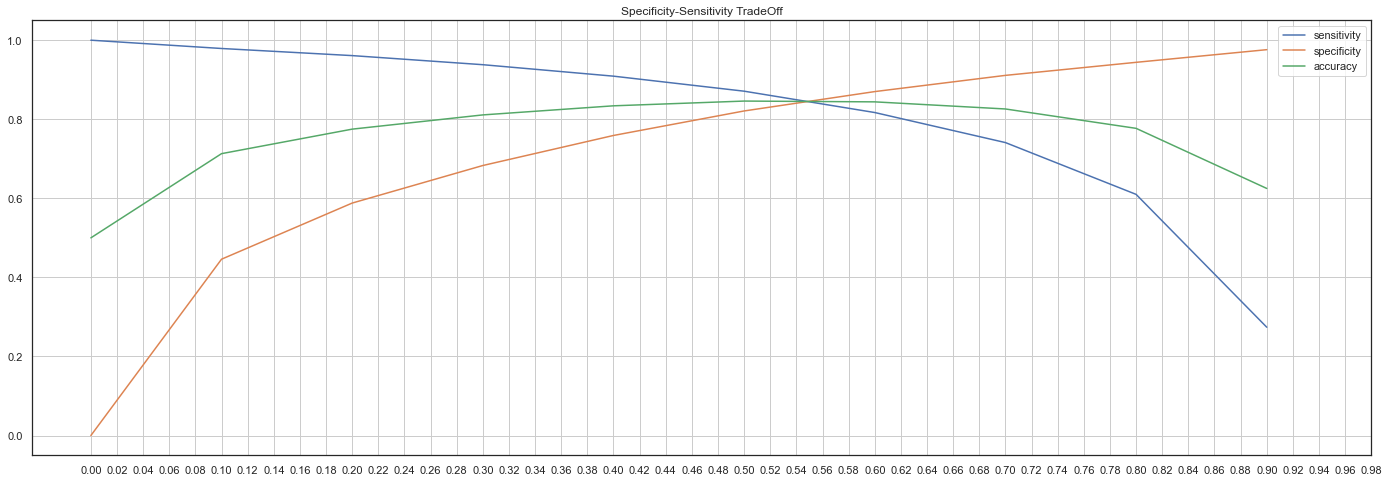

In [139]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [140]:
optimum_cutoff = 0.53
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[7823 1535]
 [1337 8021]]

Confusion Matrix for test: 
 [[3356  668]
 [  79  311]]


In [141]:
print('Train Performance: \n')
model_stats(train_matrix)

print('\n\nTest Performance : \n')
model_stats(test_matrix)

Train Performance: 

Accuracy : 0.847
Sensitivity / True Positive Rate / Recall : 0.857
Specificity / True Negative Rate :  0.836
Precision / Positive Predictive Value : 0.839
F1-score : 0.848


Test Performance : 

Accuracy : 0.831
Sensitivity / True Positive Rate / Recall : 0.797
Specificity / True Negative Rate :  0.834
Precision / Positive Predictive Value : 0.318
F1-score : 0.455


In [142]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.91 

ROC AUC score for Test :  0.877


# Logistic Regression Model1

In [143]:
lr_summary_html = logr9_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



std_og_mou_7          3988.4407
std_og_t2m_mou_7     -2795.0364
std_og_t2t_mou_7     -2680.4419
loc_ic_mou_6         -277.1150 
loc_ic_t2m_mou_6      191.4859 
loc_ic_t2t_mou_6      135.4839 
std_og_t2f_mou_7     -59.1601  
loc_ic_t2f_mou_6      36.5243  
offnet_mou_8         -1.6070   
std_og_t2m_mou_8      1.3150   
loc_ic_mou_8         -1.1446   
total_rech_num_8     -0.9325   
total_ic_mou_8       -0.7257   
onnet_mou_6          -0.6874   
std_og_t2t_mou_6      0.6805   
last_day_rch_amt_8   -0.6308   
total_ic_mou_7        0.4967   
vol_3g_mb_8          -0.4723   
loc_og_t2t_mou_6      0.4680   
total_rech_num_7      0.4540   
const                -0.4445   
roam_og_mou_8         0.4226   
vol_2g_mb_8          -0.4007   
isd_og_mou_8          0.3795   
loc_og_t2t_mou_8     -0.3647   
tenure               -0.3532   
std_ic_t2t_mou_8     -0.3003   
std_og_mou_8         -0.2777   
loc_ic_t2f_mou_7     -0.2449   
std_ic_t2m_mou_8      0.2443   
isd_ic_mou_7          0.2282   
roam_og_

# PCA

In [144]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
#pca = IncrementalPCA(n_components=16) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[-9.99999043e-01,  1.98468901e-04,  1.35940944e-05, ...,
         8.04370458e-05, -4.15710550e-06,  1.06031498e-04],
       [-8.06187063e-05,  1.42191544e-01,  1.74489263e-01, ...,
         1.87379794e-01, -2.26713216e-03,  1.58340403e-01],
       [-2.05770749e-04,  1.57772792e-01,  1.85491937e-01, ...,
         1.99680861e-01,  9.68929904e-04,  1.71632364e-01],
       ...,
       [ 6.70490664e-10,  2.36697574e-08,  7.78247897e-08, ...,
        -6.96665516e-08,  5.86591356e-07,  5.07459682e-08],
       [ 3.24684155e-10,  1.53673275e-07, -1.45531180e-07, ...,
         8.67031623e-08, -1.04075841e-06,  4.07153088e-09],
       [-0.00000000e+00,  4.08248290e-01,  4.08248290e-01, ...,
        -1.23512311e-15, -9.59562291e-15, -8.16496581e-01]])

In [145]:
pca.explained_variance_ratio_

array([9.72338584e-01, 7.16307379e-03, 5.10902906e-03, 2.98126767e-03,
       2.07308719e-03, 1.87232225e-03, 1.66113776e-03, 9.25045159e-04,
       7.17297796e-04, 6.98523912e-04, 5.17527113e-04, 4.12202840e-04,
       3.96606335e-04, 3.65620227e-04, 3.34068670e-04, 2.61539936e-04,
       2.14579571e-04, 1.73823718e-04, 1.51503977e-04, 1.44368562e-04,
       1.34267243e-04, 1.20227681e-04, 1.11671246e-04, 1.03363330e-04,
       8.81397309e-05, 8.49781846e-05, 8.14418667e-05, 7.42447513e-05,
       6.93170705e-05, 5.79552873e-05, 5.50121306e-05, 4.64720871e-05,
       4.40803952e-05, 4.20438961e-05, 3.76664593e-05, 3.33253965e-05,
       2.72502296e-05, 2.61730575e-05, 2.45212087e-05, 2.16606759e-05,
       1.97023963e-05, 1.83430920e-05, 1.81506621e-05, 1.77177537e-05,
       1.44493853e-05, 1.30449225e-05, 1.21975808e-05, 1.20641520e-05,
       1.11946495e-05, 1.06194237e-05, 8.09780236e-06, 7.24671581e-06,
       5.30067182e-06, 4.50235529e-06, 3.71667634e-06, 3.40944445e-06,
      

In [146]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=20)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,churn_probability
67305,-32190.847595,-1037.667187,10.737436,-246.080828,628.167013,180.500228,469.181402,-24.386693,-283.498836,103.504335,-173.629103,-177.224571,34.728842,277.384800,122.115633,-165.104970,127.697199,-190.469868,122.929729,-279.088136,116.765578,84.858166,-14.139418,51.416294,7.378690,-20.733740,68.343789,41.821273,76.025765,-11.510769,69.413139,86.511209,16.306254,-47.482816,125.239138,-151.230947,-13.556221,-45.007698,-11.501376,-7.604804,111.490918,-53.779526,1.759597,16.521505,21.456580,0
4937,30176.648998,-908.032736,-481.703764,716.486025,-103.263165,-211.164446,415.498964,-361.095752,-318.909112,-165.420015,-149.480204,3.210853,-36.409953,-130.023953,180.618596,-520.307184,25.707632,191.470434,56.809058,203.965549,132.758999,32.605929,-376.795626,-74.540267,-36.039206,8.209762,-42.719039,-53.074782,-4.585247,53.663154,70.154624,-67.370962,-15.455315,121.312886,-111.150358,19.500430,-9.126605,217.057247,51.021611,335.827152,41.085387,-53.969784,63.885074,142.911398,-32.771552,0
18431,16682.992568,-308.096385,-155.364750,1057.490054,-65.882978,-59.929175,-18.294239,347.976052,-407.032286,-65.936033,-46.618195,-50.004417,-1.913882,-303.908420,169.991175,-37.393598,100.205320,383.128825,97.002137,63.491731,9.562247,-278.403507,48.822606,-53.636457,0.353592,-219.973857,84.797256,-109.725742,26.121856,-2.833984,-151.424647,91.015652,-33.040112,67.208070,31.383878,-1.140289,-5.494891,122.610045,-142.447187,-72.441478,8.736328,-1.594096,-56.864849,-26.760177,-20.993542,0
43085,-7972.784466,576.502515,-728.629600,-964.789721,-484.641165,1171.139232,853.353991,-84.702269,-310.502416,-67.880536,-136.882757,92.149035,39.954843,-193.357767,-404.945321,48.511525,-137.915705,-96.721056,-174.526391,-124.940026,49.775383,83.984095,19.922114,-14.765076,-38.710406,-22.834629,5.689643,11.644792,-3.361013,38.589806,-24.713030,1.489562,-16.009383,-20.725162,-29.722783,-17.143417,-7.758739,6.848380,-21.875389,25.594731,6.690252,3.667490,7.178078,8.221846,33.078929,0
66637,-31524.490904,-94.507518,1264.481106,-909.437219,-353.746479,535.212598,363.487120,91.210453,158.862540,11.304646,165.102027,436.086515,-350.598540,-78.462520,-274.038880,106.414994,-31.645934,50.711183,131.666800,-100.064541,30.148308,-27.034690,66.660548,-11.154223,20.880139,-51.332293,131.013577,-41.127564,-161.304199,30.885528,-11.297129,-29.336436,16.507813,-45.650449,13.397648,36.741261,13.222047,-5.701098,-62.418981,-40.581364,-28.897984,2.194578,-11.061812,3.536876,18.370102,0


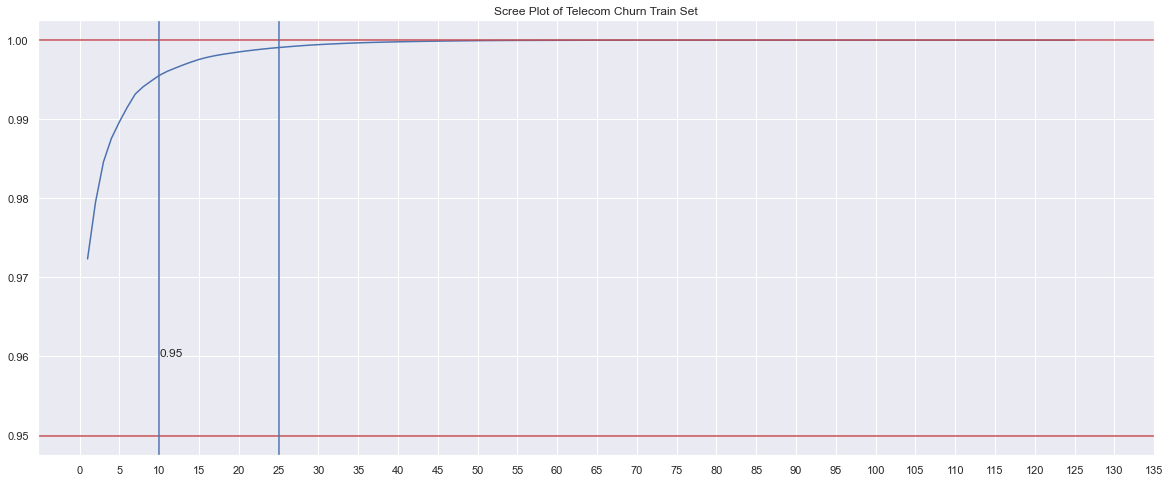

In [147]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(10,color='b')
plt.axvline(25,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

As per above plot, 95% data is lying between 10 -25 featues. This model will work best minimum 10 features and maxium 25 features can be added.

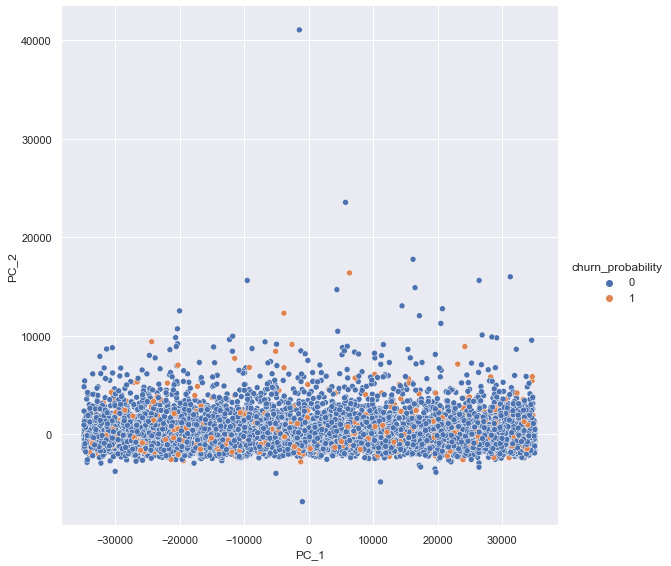

In [148]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8);

# PCA + Logistic Regression

In [149]:
# X,y Split
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [150]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 0, 0, 1, 0])

In [151]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 1, 1, 1])

In [152]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_stats(train_matrix)

print('\nTest Performance :\n')
model_stats(test_matrix)

Train Performance :

Accuracy : 0.554
Sensitivity / True Positive Rate / Recall : 0.936
Specificity / True Negative Rate :  0.516
Precision / Positive Predictive Value : 0.163
F1-score : 0.278

Test Performance :

Accuracy : 0.088
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0
Precision / Positive Predictive Value : 0.088
F1-score : 0.162


In [153]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced', max_iter=2000)

In [154]:
scaler = StandardScaler()
X_train_org = X_train_pca
X_train_pca = scaler.fit_transform(X_train_pca)


Lets Hypertune to find best C

In [155]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/i311077/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/i311077/opt/anaconda3/lib/python3

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=2000, random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [156]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 0, 0, 0, 0])

In [157]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 1, 1, 1])

In [158]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_stats(train_matrix)

print('\nTest Performance :\n')
model_stats(test_matrix)

Train Performance :

Accuracy : 0.801
Sensitivity / True Positive Rate / Recall : 0.838
Specificity / True Negative Rate :  0.797
Precision / Positive Predictive Value : 0.294
F1-score : 0.435

Test Performance :

Accuracy : 0.088
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0
Precision / Positive Predictive Value : 0.088
F1-score : 0.162


In [159]:
X_train_pca = X_train_org

In [160]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [161]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [162]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.105798,0.004042,0.002083,0.000405,0.01,{'C': 0.01},0.896175,0.902174,0.903846,0.936416,0.921875,0.912097,0.014880,1,0.911493,0.903439,0.915301,0.903520,0.899733,0.906697,0.005766
1,0.104599,0.007068,0.001687,0.000131,0.1,{'C': 0.1},0.896175,0.902174,0.899038,0.936416,0.911458,0.909052,0.014615,3,0.911493,0.904762,0.915301,0.902216,0.894385,0.905631,0.007304
2,0.107316,0.005865,0.002134,0.000301,1,{'C': 1},0.890710,0.902174,0.899038,0.936416,0.906250,0.906918,0.015607,5,0.914135,0.906085,0.916667,0.902216,0.894385,0.906698,0.008084
3,0.104441,0.012501,0.001848,0.000166,10,{'C': 10},0.901639,0.902174,0.903846,0.936416,0.906250,0.910065,0.013273,2,0.911493,0.907407,0.919399,0.903520,0.897059,0.907776,0.007510
4,0.106052,0.004364,0.001742,0.000290,100,{'C': 100},0.901639,0.902174,0.899038,0.930636,0.911458,0.908989,0.011612,4,0.911493,0.906085,0.915301,0.900913,0.895722,0.905903,0.007045
5,0.108852,0.004368,0.001748,0.000161,1000,{'C': 1000},0.896175,0.902174,0.899038,0.930636,0.906250,0.906855,0.012353,6,0.910172,0.906085,0.913934,0.904824,0.894385,0.905880,0.006582


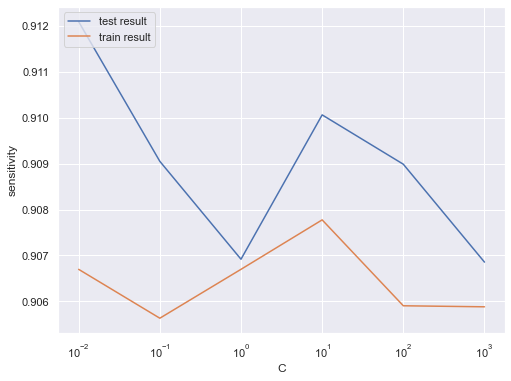

In [163]:
# Lets plot of C versus train and validation scores visualize

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [164]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9120972230497417 at C = 0.01


# Logistic Regression with optimal C

In [165]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [166]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [167]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [168]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[5385 3973]
 [  87  853]]


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:

print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.605748689065838
Sensitivity: 0.9074468085106383
Specificity: 0.5754434708270998


In [171]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [172]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[   0 4024]
 [   0  390]]


In [173]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [174]:

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity:",TP / float(TP+FN))

print("Specificity:", TN / float(TN+FP))

Accuracy: 0.0883552333484368
Sensitivity: 1.0
Specificity: 0.0


# PCA SVC

In [175]:
# Importing SVC
from sklearn.svm import SVC

In [176]:
X_train_pca = X_train_org

In [177]:
# Lets specify range of hyperparameters to tune

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)         

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [178]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.271888,0.040468,3.812673,0.030913,1,0.01,"{'C': 1, 'gamma': 0.01}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
1,2.236646,0.004791,3.827557,0.034304,1,0.001,"{'C': 1, 'gamma': 0.001}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
2,2.360836,0.029062,3.894660,0.046422,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
3,2.444245,0.010932,3.928951,0.067627,10,0.01,"{'C': 10, 'gamma': 0.01}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
4,2.479898,0.030016,4.025820,0.015451,10,0.001,"{'C': 10, 'gamma': 0.001}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
5,2.545977,0.033144,3.829576,0.032809,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
6,2.479088,0.012379,3.849644,0.084830,100,0.01,"{'C': 100, 'gamma': 0.01}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
7,2.504608,0.022992,3.975376,0.039680,100,0.001,"{'C': 100, 'gamma': 0.001}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
8,2.510554,0.009921,3.796455,0.281310,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0
9,2.442504,0.011518,3.910542,0.068415,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.908826,0.908535,0.9088,0.90872,0.000132,1,1.0,1.0,1.0,1.0,0.0


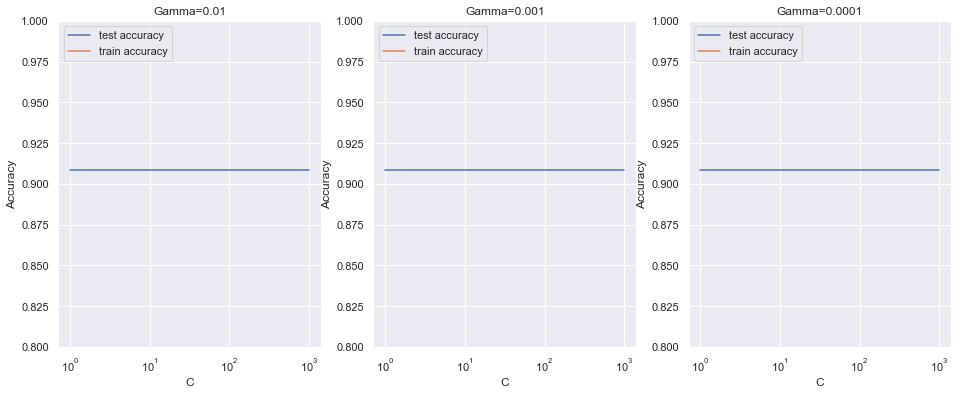

In [179]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


#### Train And test Split 


In [180]:
df = df_original

In [181]:
df_train , df_test = train_test_split(df , train_size = 0.7 , random_state = 100)

In [182]:
print(df_train.shape)
print(df_test.shape)

(14712, 126)
(6306, 126)


In [183]:
X_train.shape

(10298, 125)

In [184]:
from imblearn.over_sampling import SMOTE

In [185]:
sme = SMOTE(random_state=42)
X_train, y_train = sme.fit_resample(X_train, y_train)

In [186]:
y_train.value_counts(normalize=True).to_frame()

,churn_probability
0,0.5
1,0.5


In [187]:
X_res_train = X_train

In [188]:
y_res_train = y_train

In [189]:
pca_inc = IncrementalPCA(n_components=16)

In [190]:
df_train_pcainc = pca_inc.fit_transform(X_train)

In [191]:
df_train_pcainc.shape


(18716, 16)

In [192]:
cormat = np.corrcoef(df_train_pcainc.transpose())

In [193]:
cormat.shape

(16, 16)

<AxesSubplot:>

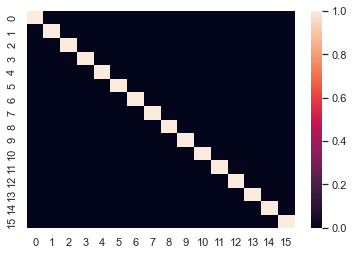

In [194]:
sns.heatmap(cormat)

In [195]:
df_test_pcainc = pca_inc.fit_transform(X_test)

In [196]:
df_test_pcainc.shape

(4414, 16)

In [197]:
Reg_PCA = LogisticRegression()

In [198]:
Churn_Model_train = Reg_PCA.fit(df_train_pcainc,y_train)

In [199]:
Churn_Model_test = Reg_PCA.fit(df_test_pcainc,y_test)

In [200]:
Churn_pred_train = Churn_Model_train.predict_proba(df_train_pcainc)
Churn_pred_test  = Churn_Model_test.predict_proba(df_test_pcainc)

In [201]:
metrics.roc_auc_score(y_train , Churn_pred_train[:,1])

0.5003782937235627

In [202]:
metrics.roc_auc_score(y_test , Churn_pred_test[:,1])

0.8398544629657949